In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

### Import Dataset

In [2]:
df = pd.read_csv('Dataset.csv', index_col=0)
df.head()

ADI  Age   person_id Gender    Subgroup  absence_indicator  \
0   28   37  3030515063   Male  Subgroup P                  0   
1   18   34  9786383567   Male  Subgroup P                  0   
2   15   36  5602306401   Male  Subgroup P                  0   
3   36   41  8107765424   Male  Subgroup P                  0   
4   49   51  7879842771   Male  Subgroup P                  0   

   analytic_period_id  tenure  overtime    salary  ...  \
0                   1   18.25         1  115700.0  ...   
1                   1    3.99         7   81435.0  ...   
2                   1    3.05         1   86400.0  ...   
3                   1   20.29         1   79176.0  ...   
4                   1   13.66         7   94511.0  ...   

   extreme_heat_ssp585_2045  wildfire_potential_2018  wildfire_potential_2019  \
0                 13.380953                10.975000                11.460870   
1                 13.380953                11.141304                11.520652   
2                 15.597403                10.393478                10.777174   
3                 12.290043                11.039130                11.023913   
4                 12.290043                10.760870                11.308696   

   wildfire_potential_2019.1  wildfire_potential_ssp245_2025  \
0                  12.070652                        6.033403   
1                  11.871739                        6.033403   
2                  11.659783                        6.064177   
3                  11.963043                        6.069724   
4                  12.006522                        6.069724   

   wildfire_potential_ssp245_2035  wildfire_potential_ssp245_2045  \
0                        6.347014                        6.512159   
1                        6.347014                        6.512159   
2                        6.380910                        6.548825   
3                        6.365864                        6.512409   
4                        6.365864                        6.512409   

   wildfire_potential_ssp585_2025  wildfire_potential_ssp585_2035  \
0                        6.093082                        6.504460   
1                        6.093082                        6.504460   
2                        6.117186                        6.522880   
3                        6.091926                        6.469195   
4                        6.091926                        6.469195   

   wildfire_potential_ssp585_2045  
0                        6.743331  
1                        6.743331  
2                        6.771772  
3                        6.700504  
4                        6.700504  

[5 rows x 74 columns]

In [3]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (43184, 74)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43184 entries, 0 to 43183
Data columns (total 74 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ADI                                 43184 non-null  int64  
 1   Age                                 43184 non-null  int64  
 2   person_id                           43184 non-null  int64  
 3   Gender                              43184 non-null  object 
 4   Subgroup                            43184 non-null  object 
 5   absence_indicator                   43184 non-null  int64  
 6   analytic_period_id                  43184 non-null  int64  
 7   tenure                              43184 non-null  float64
 8   overtime                            43184 non-null  int64  
 9   salary                              43184 non-null  float64
 10  performance_rating                  43184 non-null  int64  
 11  BiometricScreeningParticipants      43184 non-

In [5]:
data_dtypes = {}
for column in df.columns:
    # print('{}:{}'.format(column, df[column].isna().sum()))
    data_dtypes[column] =  df[column].dtype
    
print(data_dtypes)

{'ADI': dtype('int64'), 'Age': dtype('int64'), 'person_id': dtype('int64'), 'Gender': dtype('O'), 'Subgroup': dtype('O'), 'absence_indicator': dtype('int64'), 'analytic_period_id': dtype('int64'), 'tenure': dtype('float64'), 'overtime': dtype('int64'), 'salary': dtype('float64'), 'performance_rating': dtype('int64'), 'BiometricScreeningParticipants': dtype('int64'), 'HRQParticipants': dtype('int64'), 'lsbio_cholesterol': dtype('int64'), 'lsbio_glucose': dtype('int64'), 'lsbio_bp': dtype('int64'), 'lsbio_weight': dtype('int64'), 'lsbio_trig': dtype('int64'), 'lshrq_physact': dtype('int64'), 'lshrq_tobacco': dtype('int64'), 'lshrq_nutrition': dtype('int64'), 'lshrq_stress': dtype('int64'), 'lshrq_genHealth': dtype('int64'), 'lshrq_wellbeing': dtype('int64'), 'lshrq_alcohol': dtype('int64'), 'lshrq_sleeping': dtype('int64'), 'cc_RespiratorySinusAllergy_chronic': dtype('int64'), 'cc_diabetes': dtype('int64'), 'cc_cancer': dtype('int64'), 'cc_mskChronic': dtype('int64'), 'cc_cholesterol': d

### Split data into individual period

In [6]:
# split into individual analytical periods

df_2018 = df.loc[(df.analytic_period_id==1) & (df.Subgroup=='Subgroup P')]
df_2019 = df.loc[(df.analytic_period_id==2) & (df.Subgroup=='Subgroup P')]
df_2020 = df.loc[(df.analytic_period_id==3) & (df.Subgroup=='Subgroup P')]

In [7]:
print("2018 dims : ", df_2018.shape)
print("2019 dims : ", df_2019.shape)
print("2020 dims : ", df_2020.shape)

2018 dims :  (7249, 74)
2019 dims :  (6384, 74)
2020 dims :  (5990, 74)


### Multinomial Logistic Regression

#### Find the significant health factors to the performance rating

#### 2018

C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\1576075116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\1576075116.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

Train Set : (5436, 1) (5436, 30)
Test Set  : (1813, 1) (1813, 30)
Intercept of Regression 	: b =  [-0.65415858  1.64197244 -0.98781386]
                            Predictors  Coefficients
0                                  ADI     -0.001393
1                                  Age     -0.012668
2                    lsbio_cholesterol      0.021484
3                        lsbio_glucose     -0.055235
4                             lsbio_bp      0.114053
5                         lsbio_weight      0.017332
6                           lsbio_trig     -0.136922
7                        lshrq_physact     -0.194769
8                        lshrq_tobacco     -0.083599
9                      lshrq_nutrition     -0.076869
10                        lshrq_stress     -0.081874
11                     lshrq_genHealth     -0.161508
12                     lshrq_wellbeing     -0.096593
13                       lshrq_alcohol     -0.247897
14                      lshrq_sleeping     -0.046904
15  cc_Respirato

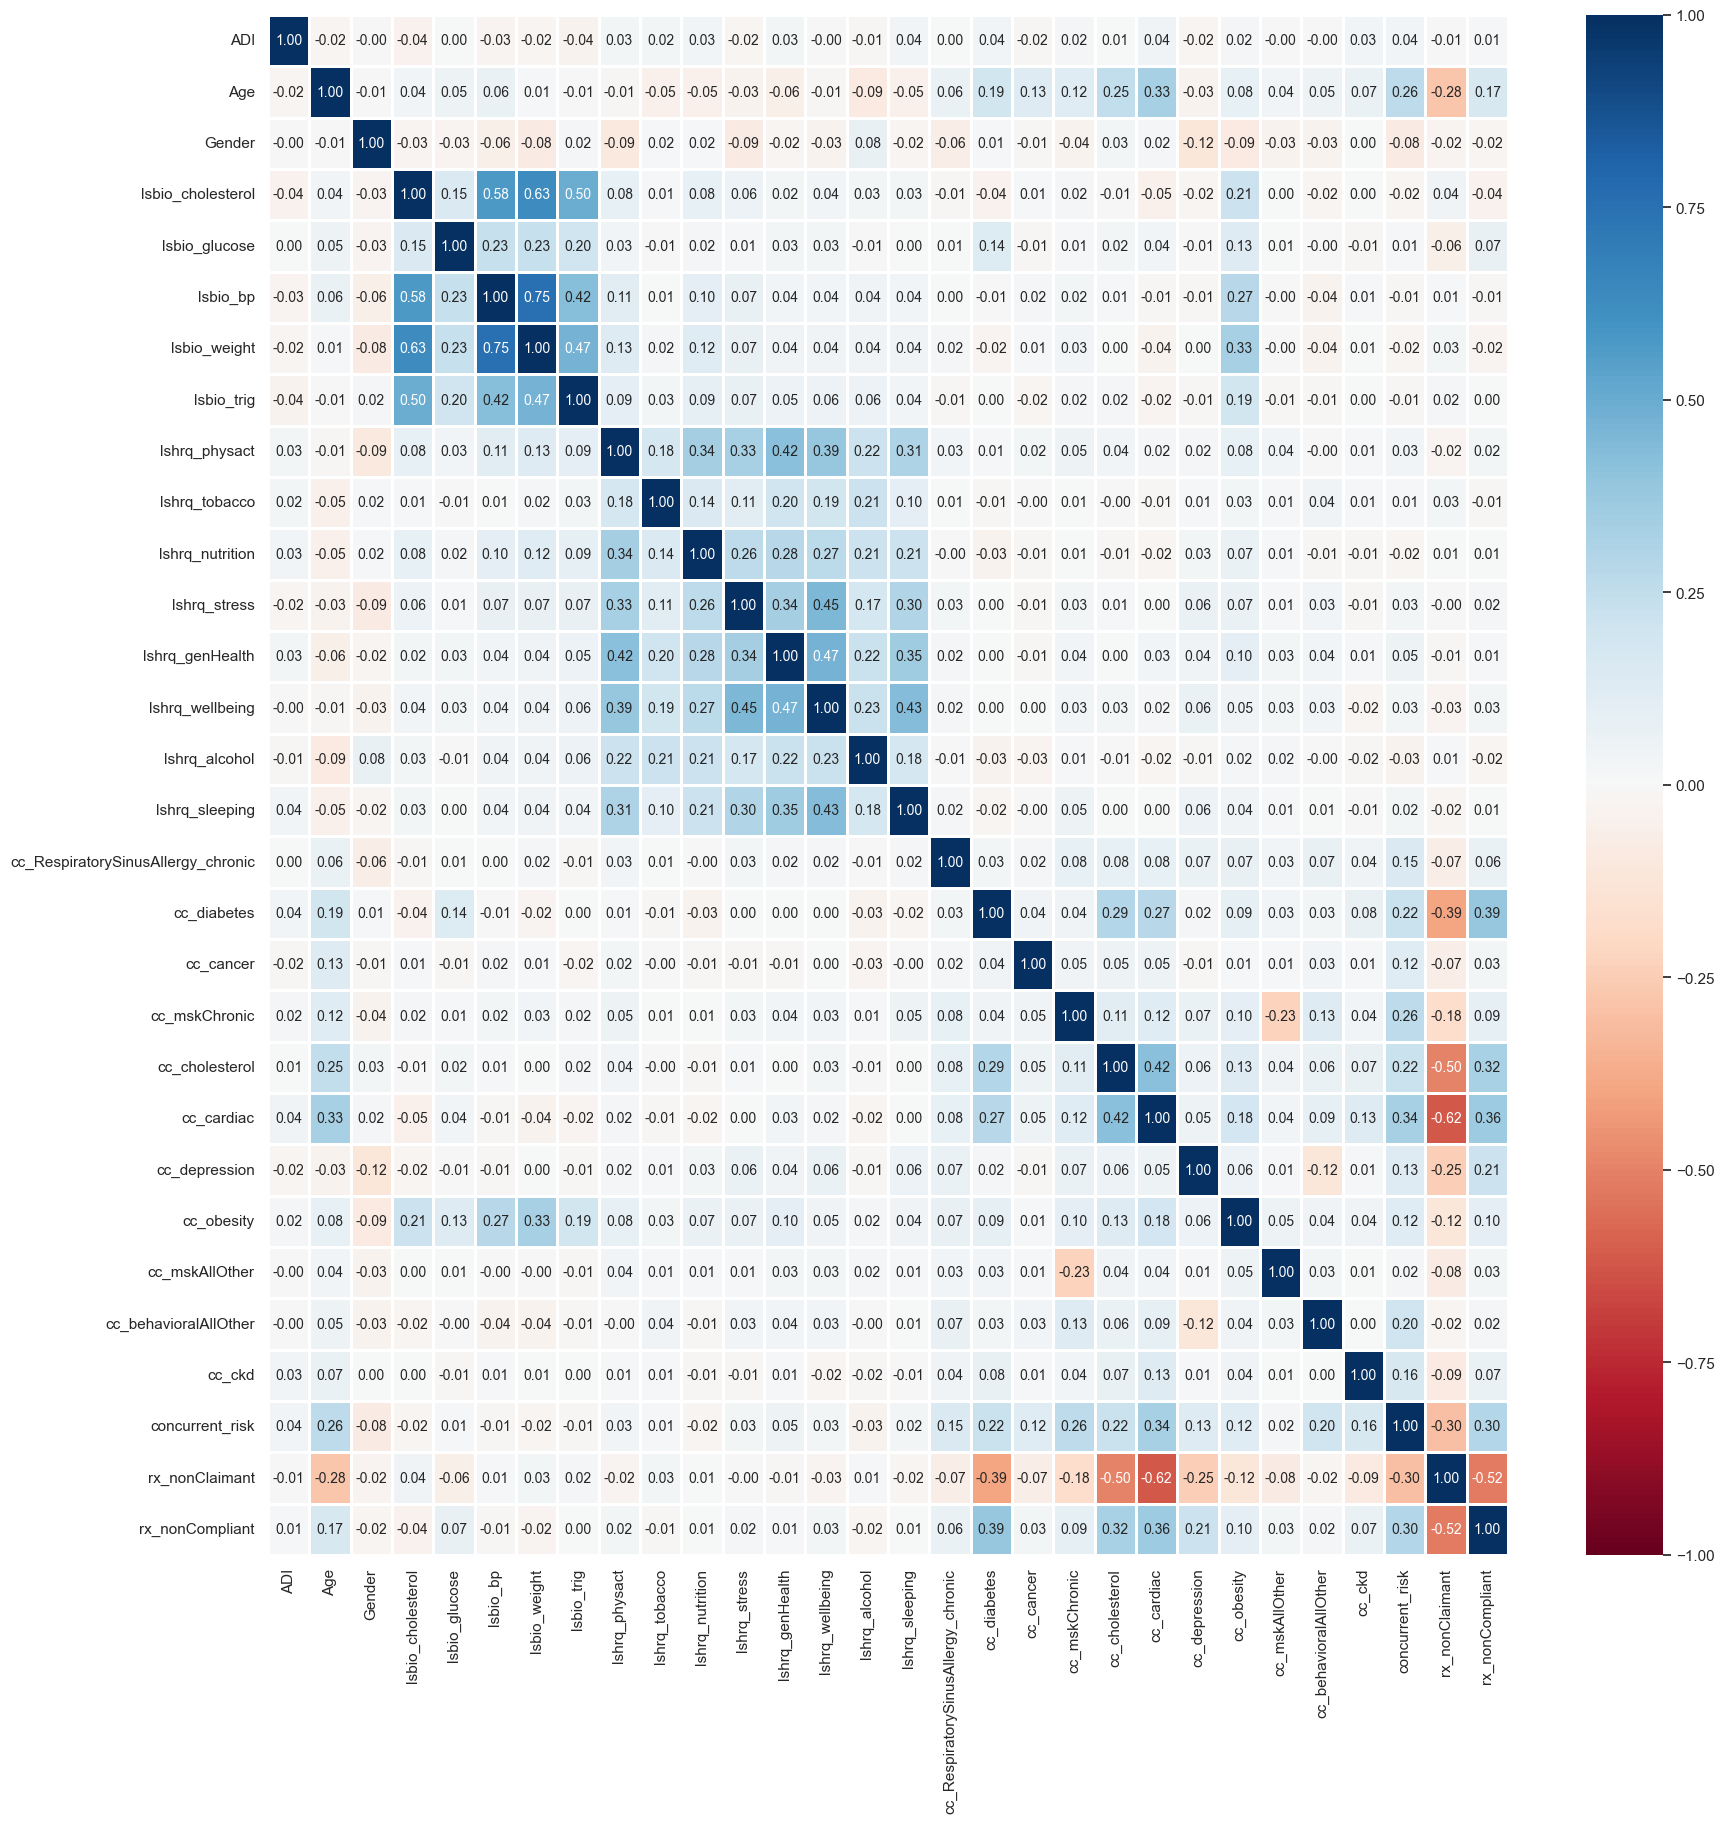

In [8]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2018['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2018[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [9]:
# check vif data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif_constant = sm.add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif_constant.values, i) for i in range(x_vif_constant.shape[1])]

vif_data

Variable        VIF
0                                const  45.562737
1                                  ADI   1.014887
2                                  Age   1.224125
3                    lsbio_cholesterol   1.899788
4                        lsbio_glucose   1.102543
5                             lsbio_bp   2.457620
6                         lsbio_weight   2.859287
7                           lsbio_trig   1.446151
8                        lshrq_physact   1.453901
9                        lshrq_tobacco   1.102731
10                     lshrq_nutrition   1.236898
11                        lshrq_stress   1.369778
12                     lshrq_genHealth   1.512454
13                     lshrq_wellbeing   1.643080
14                       lshrq_alcohol   1.160300
15                      lshrq_sleeping   1.326234
16  cc_RespiratorySinusAllergy_chronic   1.039617
17                         cc_diabetes   1.319214
18                           cc_cancer   1.032526
19                       cc_mskChronic   1.196727
20                      cc_cholesterol   1.428011
21                          cc_cardiac   1.896589
22                       cc_depression   1.180131
23                          cc_obesity   1.212548
24                      cc_mskAllOther   1.086145
25               cc_behavioralAllOther   1.095967
26                              cc_ckd   1.043930
27                     concurrent_risk   1.304368
28                      rx_nonClaimant   2.394708
29                     rx_nonCompliant   1.505086
30                            Gender_1   1.064759

In [10]:
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
model = sm.MNLogit(y, x_with_constant)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.480043
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:     performance_rating   No. Observations:                 7249
Model:                        MNLogit   Df Residuals:                     7187
Method:                           MLE   Df Model:                           60
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                 0.03063
Time:                        11:48:44   Log-Likelihood:                -3479.8
converged:                       True   LL-Null:                       -3589.8
Covariance Type:            nonrobust   LLR p-value:                 4.283e-20
              performance_rating=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.2707      0.552    

In [11]:
significant_variable_2018 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'rating3', 1: 'rating4'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_2018['performance 3'] = p_value_dataframe[(p_value_dataframe['rating3'] < 0.1)].index.tolist()
significant_variable_2018['performance 4'] = p_value_dataframe[(p_value_dataframe['rating4'] < 0.1)].index.tolist()

print(significant_variable_2018)

{'performance 3': ['const', 'ADI', 'Age', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1'], 'performance 4': ['const', 'lshrq_genHealth', 'lshrq_alcohol', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1']}


#### 2019

C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\2426842272.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\2426842272.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

Train Set : (4788, 1) (4788, 30)
Test Set  : (1596, 1) (1596, 30)
Intercept of Regression 	: b =  [-0.4164058   1.25621053 -0.83980473]
                            Predictors  Coefficients
0                                  ADI     -0.006031
1                                  Age     -0.013650
2                    lsbio_cholesterol      0.062256
3                        lsbio_glucose      0.108200
4                             lsbio_bp     -0.186700
5                         lsbio_weight     -0.174016
6                           lsbio_trig     -0.034431
7                        lshrq_physact     -0.245894
8                        lshrq_tobacco     -0.014342
9                      lshrq_nutrition     -0.236034
10                        lshrq_stress     -0.060820
11                     lshrq_genHealth      0.014262
12                     lshrq_wellbeing      0.114381
13                       lshrq_alcohol     -0.005281
14                      lshrq_sleeping      0.123982
15  cc_Respirato

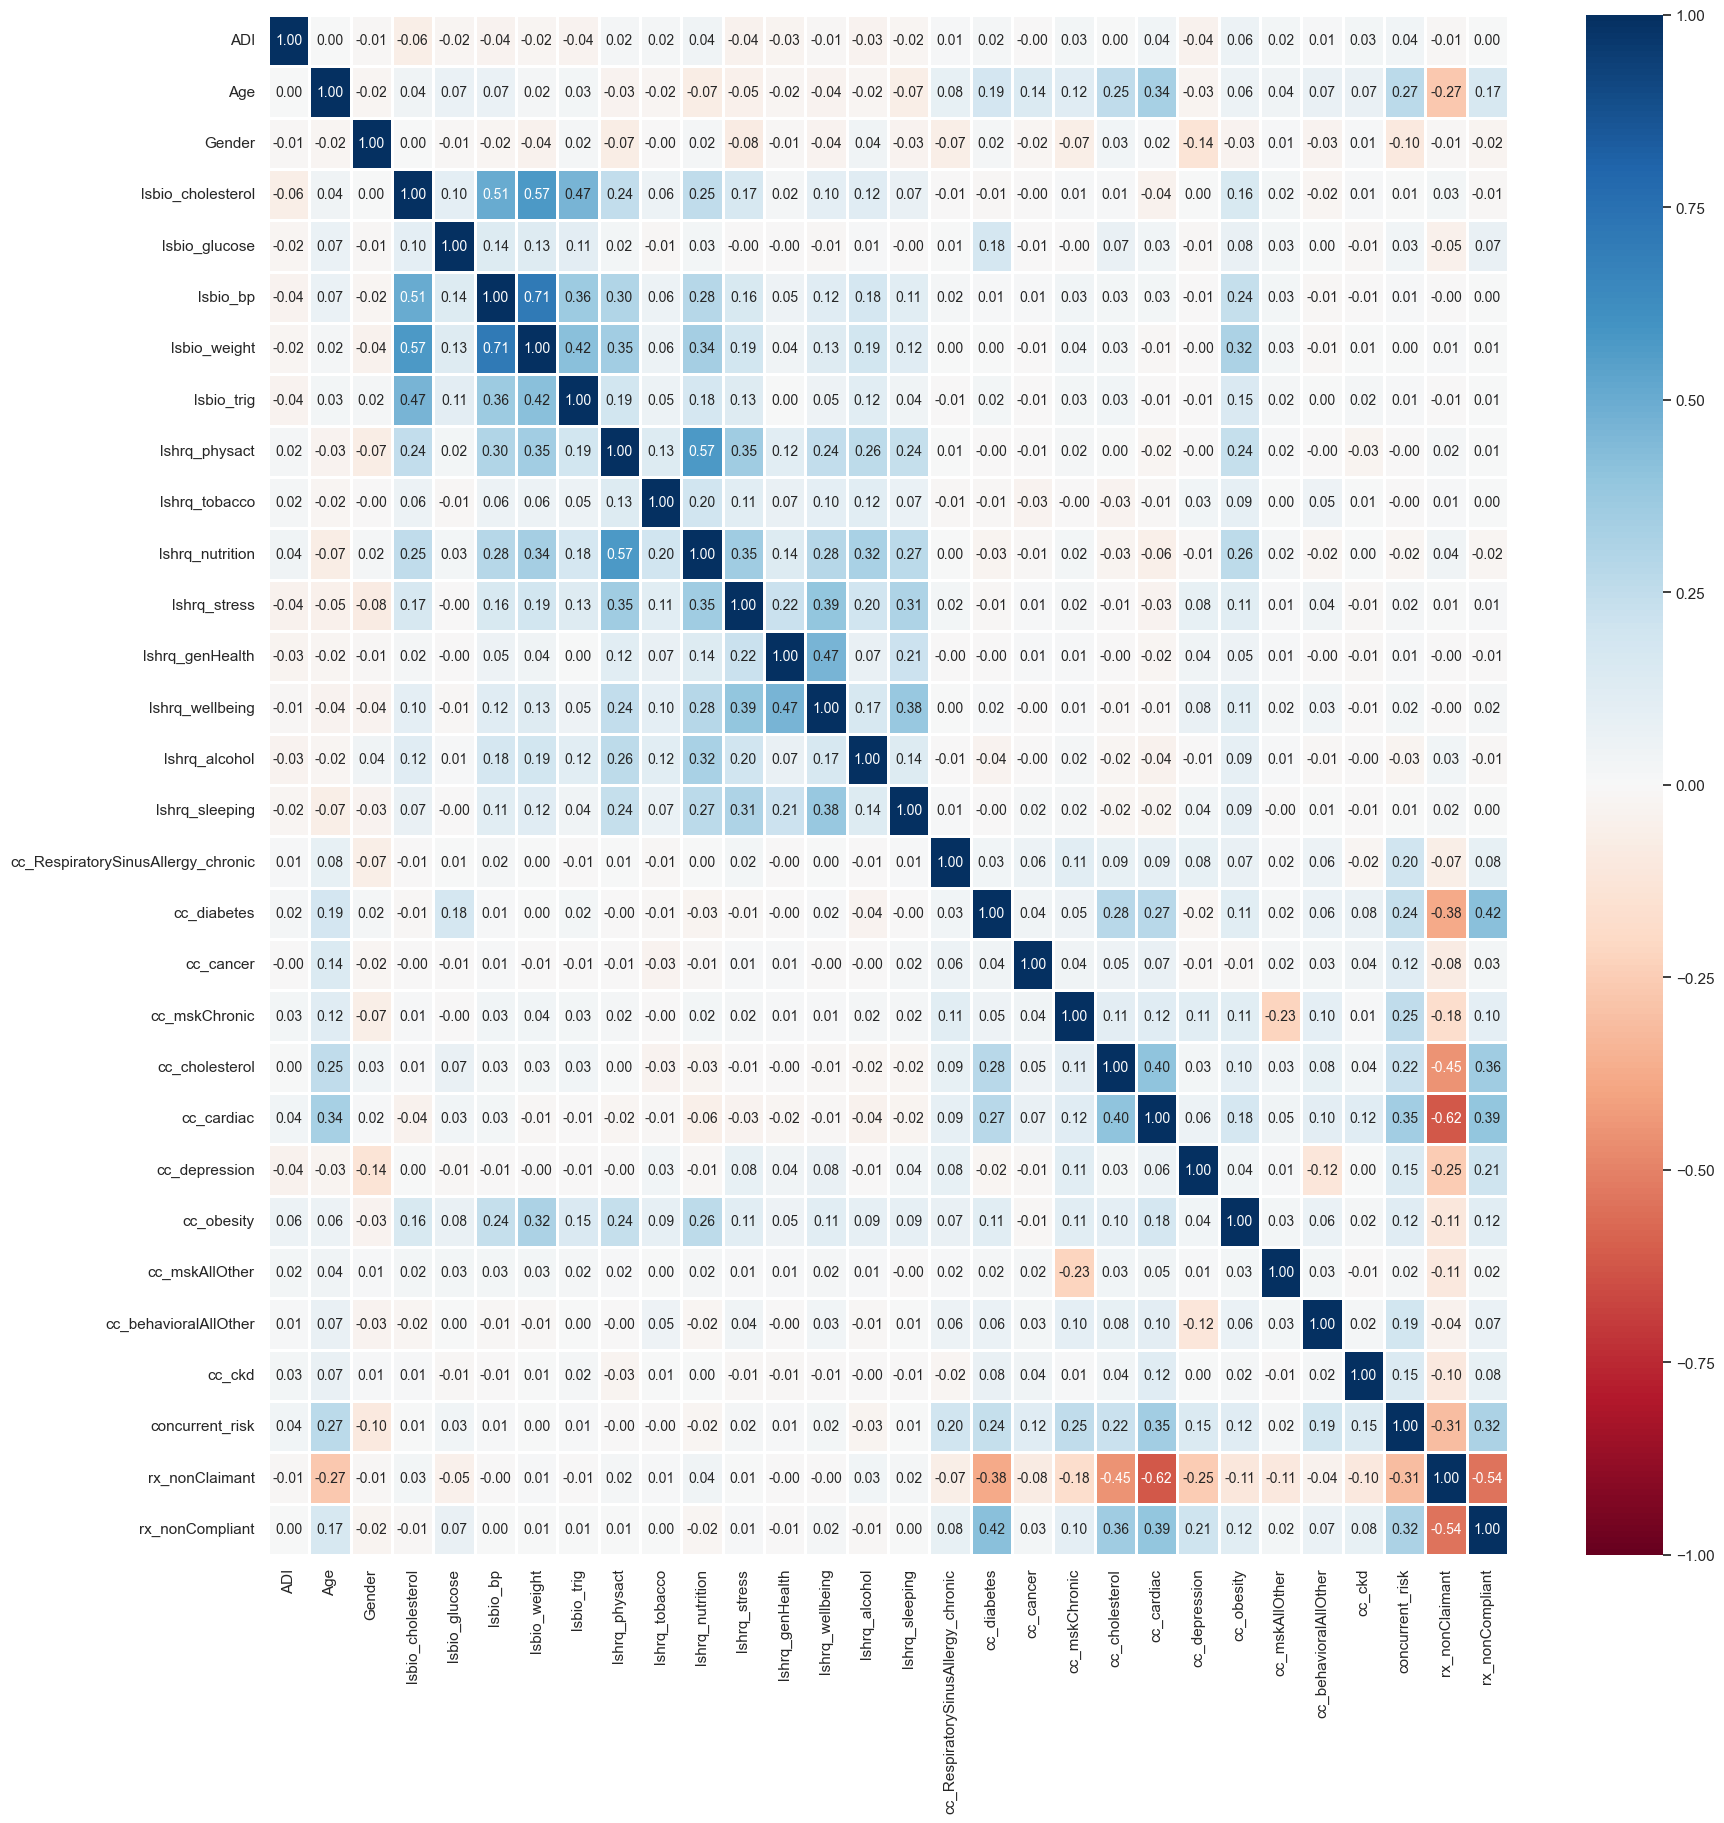

In [12]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2019['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2019[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [13]:
# check vif data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif_constant = sm.add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif_constant.values, i) for i in range(x_vif_constant.shape[1])]

vif_data

Variable        VIF
0                                const  45.419468
1                                  ADI   1.026019
2                                  Age   1.230310
3                    lsbio_cholesterol   1.755620
4                        lsbio_glucose   1.066120
5                             lsbio_bp   2.170575
6                         lsbio_weight   2.575414
7                           lsbio_trig   1.373436
8                        lshrq_physact   1.670961
9                        lshrq_tobacco   1.064920
10                     lshrq_nutrition   1.810749
11                        lshrq_stress   1.395741
12                     lshrq_genHealth   1.287403
13                     lshrq_wellbeing   1.586772
14                       lshrq_alcohol   1.162605
15                      lshrq_sleeping   1.257520
16  cc_RespiratorySinusAllergy_chronic   1.056793
17                         cc_diabetes   1.367194
18                           cc_cancer   1.038360
19                       cc_mskChronic   1.196163
20                      cc_cholesterol   1.379164
21                          cc_cardiac   1.936986
22                       cc_depression   1.211892
23                          cc_obesity   1.231366
24                      cc_mskAllOther   1.103104
25               cc_behavioralAllOther   1.085494
26                              cc_ckd   1.044378
27                     concurrent_risk   1.323758
28                      rx_nonClaimant   2.352624
29                     rx_nonCompliant   1.635040
30                            Gender_1   1.064124

In [14]:
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
model = sm.MNLogit(y, x_with_constant)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.454846
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:     performance_rating   No. Observations:                 6384
Model:                        MNLogit   Df Residuals:                     6322
Method:                           MLE   Df Model:                           60
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                 0.02222
Time:                        11:48:46   Log-Likelihood:                -2903.7
converged:                       True   LL-Null:                       -2969.7
Covariance Type:            nonrobust   LLR p-value:                 2.514e-07
              performance_rating=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  4.2597      0.587    

In [15]:
significant_variable_2019 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'rating3', 1: 'rating4'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_2019['performance 3'] = p_value_dataframe[(p_value_dataframe['rating3'] < 0.1)].index.tolist()
significant_variable_2019['performance 4'] = p_value_dataframe[(p_value_dataframe['rating4'] < 0.1)].index.tolist()

print(significant_variable_2019)

{'performance 3': ['const', 'lsbio_glucose', 'lshrq_nutrition', 'lshrq_sleeping', 'concurrent_risk', 'Gender_1'], 'performance 4': ['const', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lshrq_nutrition', 'lshrq_sleeping', 'cc_mskChronic', 'Gender_1']}


#### 2020

C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\3208961863.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\3208961863.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

Train Set : (4492, 1) (4492, 30)
Test Set  : (1498, 1) (1498, 30)
Intercept of Regression 	: b =  [-0.34187756  1.03824714 -0.69636958]
                            Predictors  Coefficients
0                                  ADI     -0.010039
1                                  Age     -0.025654
2                    lsbio_cholesterol      0.058796
3                        lsbio_glucose      0.043266
4                             lsbio_bp      0.078883
5                         lsbio_weight     -0.007030
6                           lsbio_trig      0.030356
7                        lshrq_physact     -0.127127
8                        lshrq_tobacco     -0.006305
9                      lshrq_nutrition     -0.159286
10                        lshrq_stress      0.015541
11                     lshrq_genHealth      0.021956
12                     lshrq_wellbeing      0.119617
13                       lshrq_alcohol     -0.034250
14                      lshrq_sleeping      0.010398
15  cc_Respirato

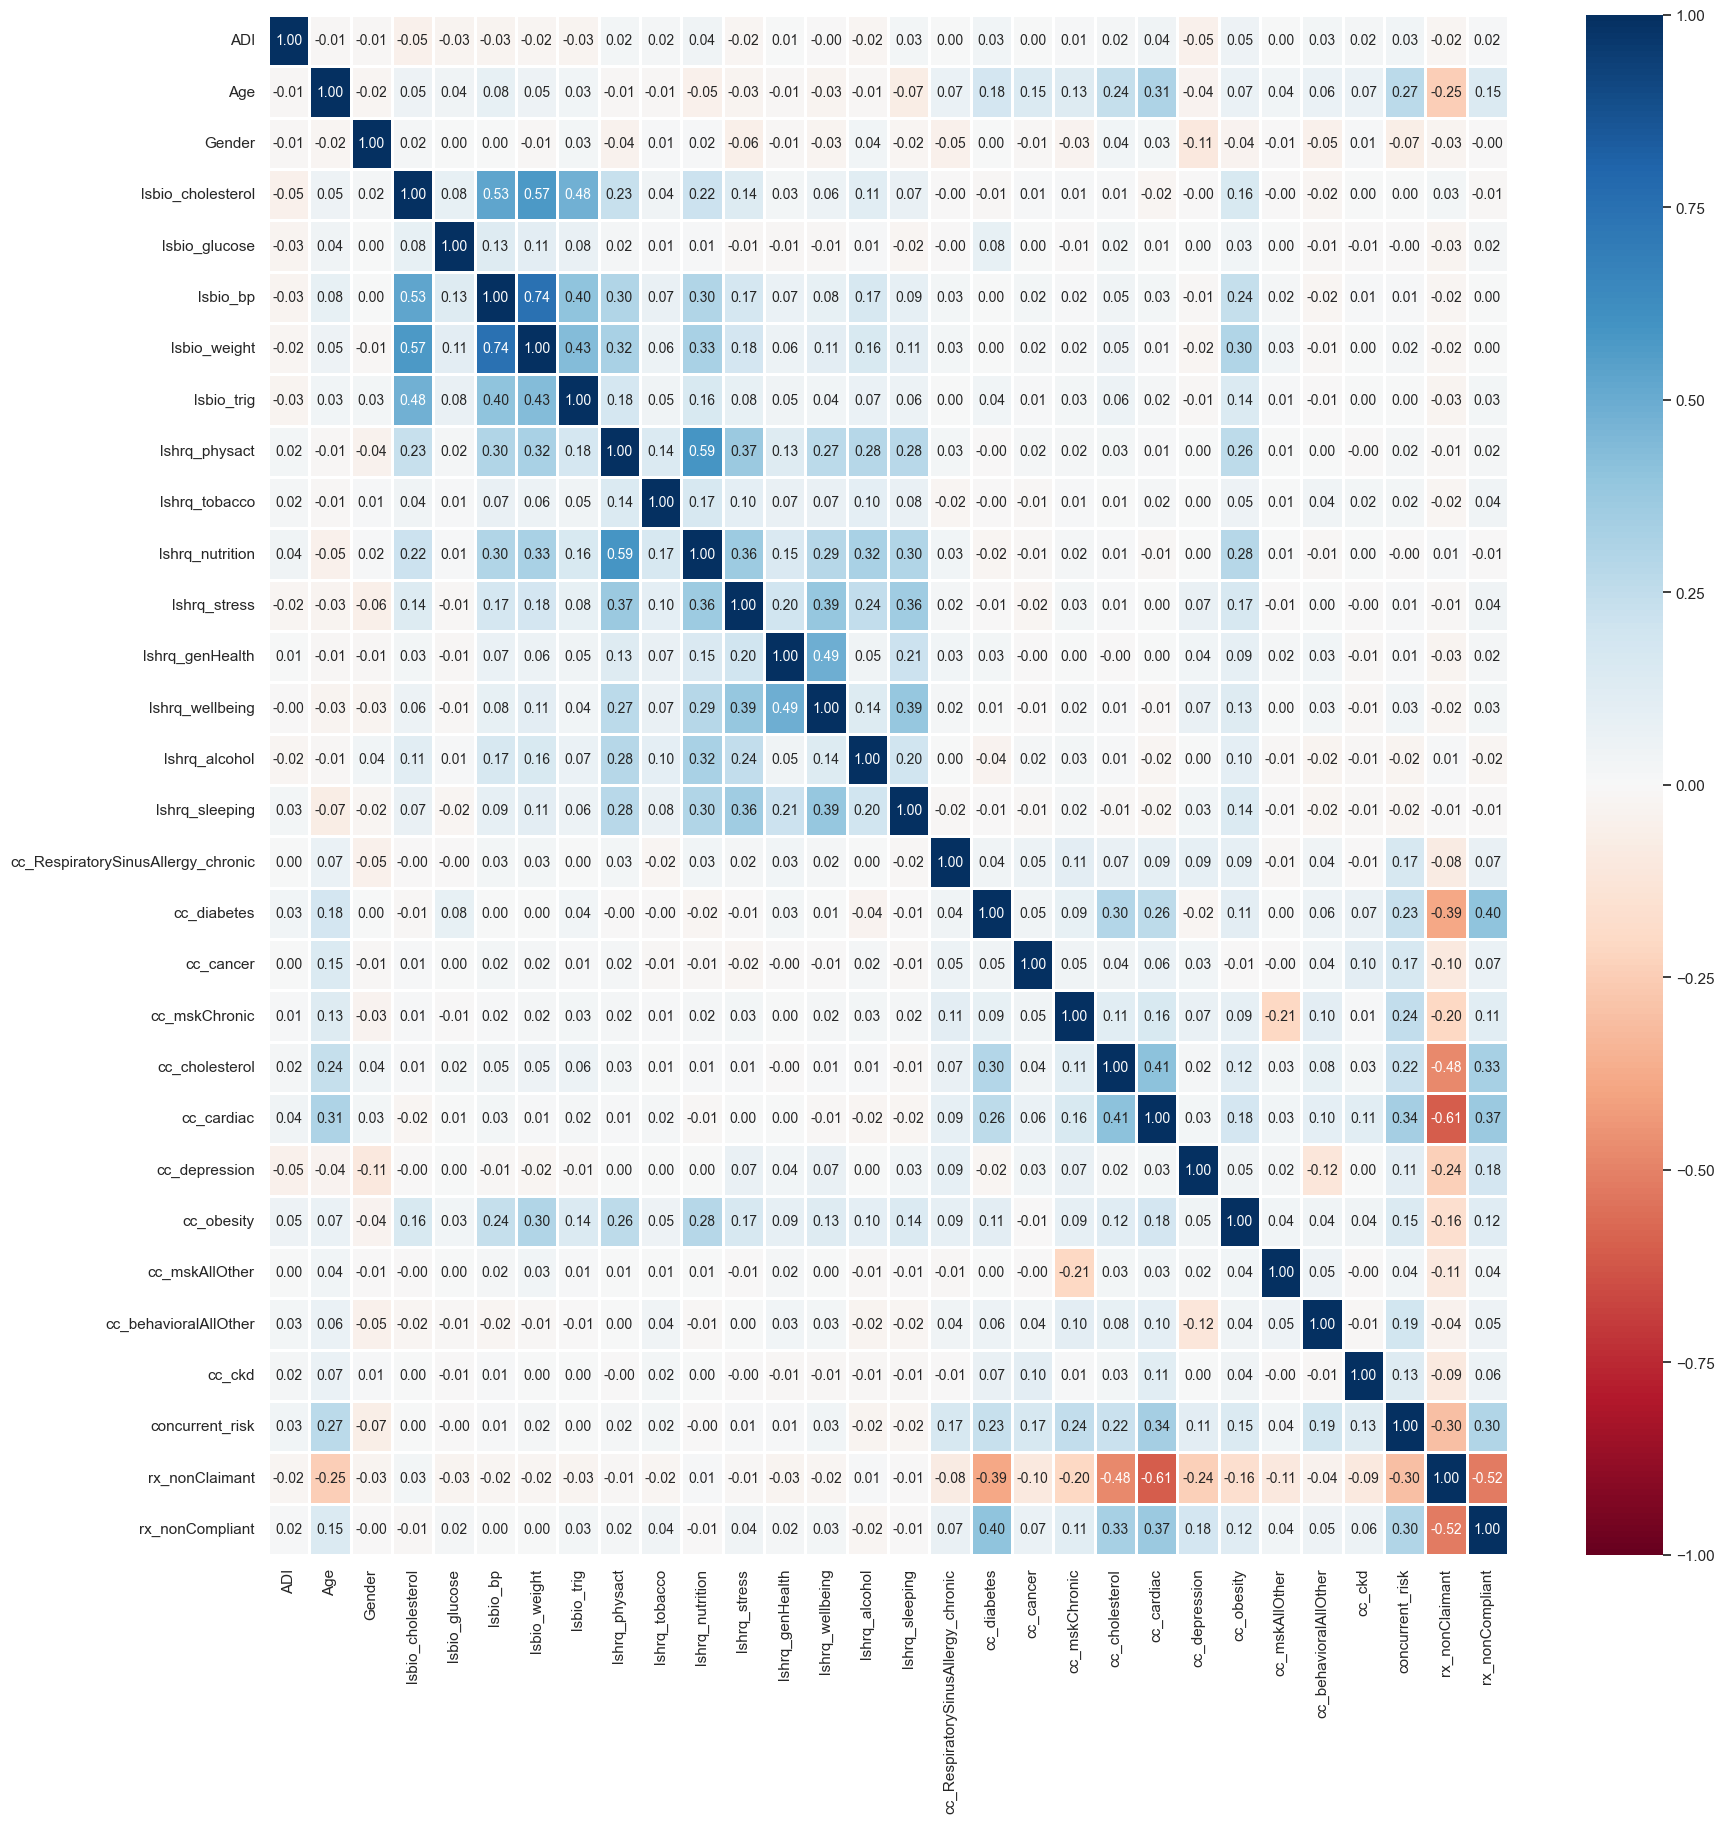

In [16]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2020['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2020[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [17]:
# check vif data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif_constant = sm.add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif_constant.values, i) for i in range(x_vif_constant.shape[1])]

vif_data

Variable        VIF
0                                const  46.270876
1                                  ADI   1.019297
2                                  Age   1.200657
3                    lsbio_cholesterol   1.703670
4                        lsbio_glucose   1.033177
5                             lsbio_bp   2.485094
6                         lsbio_weight   2.731433
7                           lsbio_trig   1.399920
8                        lshrq_physact   1.701940
9                        lshrq_tobacco   1.047357
10                     lshrq_nutrition   1.754626
11                        lshrq_stress   1.396731
12                     lshrq_genHealth   1.328588
13                     lshrq_wellbeing   1.629555
14                       lshrq_alcohol   1.159024
15                      lshrq_sleeping   1.332400
16  cc_RespiratorySinusAllergy_chronic   1.045493
17                         cc_diabetes   1.339651
18                           cc_cancer   1.050333
19                       cc_mskChronic   1.180524
20                      cc_cholesterol   1.421368
21                          cc_cardiac   1.855053
22                       cc_depression   1.177816
23                          cc_obesity   1.254362
24                      cc_mskAllOther   1.093636
25               cc_behavioralAllOther   1.081429
26                              cc_ckd   1.036356
27                     concurrent_risk   1.310746
28                      rx_nonClaimant   2.369182
29                     rx_nonCompliant   1.548078
30                            Gender_1   1.040463

In [18]:
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
model = sm.MNLogit(y, x_with_constant)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446286
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:     performance_rating   No. Observations:                 5990
Model:                        MNLogit   Df Residuals:                     5928
Method:                           MLE   Df Model:                           60
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                 0.02829
Time:                        11:48:48   Log-Likelihood:                -2673.3
converged:                       True   LL-Null:                       -2751.1
Covariance Type:            nonrobust   LLR p-value:                 1.959e-10
              performance_rating=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.5412      0.779    

In [19]:
significant_variable_2020 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'rating3', 1: 'rating4'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_2020['performance 3'] = p_value_dataframe[(p_value_dataframe['rating3'] < 0.1)].index.tolist()
significant_variable_2020['performance 4'] = p_value_dataframe[(p_value_dataframe['rating4'] < 0.1)].index.tolist()

print(significant_variable_2020)

{'performance 3': ['const', 'Age', 'lshrq_wellbeing', 'cc_depression', 'Gender_1'], 'performance 4': ['const', 'cc_depression', 'cc_mskAllOther', 'Gender_1']}


#### Compare significant variables

In [20]:
print('2018: {}'.format(significant_variable_2018))
print('2019: {}'.format(significant_variable_2019))
print('2020: {}'.format(significant_variable_2020))

2018: {'performance 3': ['const', 'ADI', 'Age', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1'], 'performance 4': ['const', 'lshrq_genHealth', 'lshrq_alcohol', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1']}
2019: {'performance 3': ['const', 'lsbio_glucose', 'lshrq_nutrition', 'lshrq_sleeping', 'concurrent_risk', 'Gender_1'], 'performance 4': ['const', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lshrq_nutrition', 'lshrq_sleeping', 'cc_mskChronic', 'Gender_1']}
2020: {'performance 3': ['const', 'Age', 'lshrq_wellbeing', 'cc_depression', 'Gender_1'], 'performance 4': ['const', 'cc_depression', 'cc_mskAllOther', 'Gender_1']}


In [21]:
from collections import Counter

performance_3_lists = sum([d['performance 3'] for d in [significant_variable_2018, significant_variable_2019, significant_variable_2020]], [])
performance_4_lists = sum([d['performance 4'] for d in [significant_variable_2018, significant_variable_2019, significant_variable_2020]], [])

performance_3_counts = Counter(performance_3_lists)
performance_4_counts = Counter(performance_4_lists)

print(f"Performance 3 Counts: {performance_3_counts}")
print(f"Performance 4 Counts: {performance_4_counts}")

Performance 3 Counts: Counter({'const': 3, 'Gender_1': 3, 'Age': 2, 'cc_depression': 2, 'concurrent_risk': 2, 'ADI': 1, 'cc_mskAllOther': 1, 'cc_ckd': 1, 'lsbio_glucose': 1, 'lshrq_nutrition': 1, 'lshrq_sleeping': 1, 'lshrq_wellbeing': 1})
Performance 4 Counts: Counter({'const': 3, 'Gender_1': 3, 'cc_mskChronic': 2, 'cc_depression': 2, 'cc_mskAllOther': 2, 'lshrq_genHealth': 1, 'lshrq_alcohol': 1, 'cc_ckd': 1, 'concurrent_risk': 1, 'lsbio_cholesterol': 1, 'lsbio_glucose': 1, 'lsbio_bp': 1, 'lshrq_nutrition': 1, 'lshrq_sleeping': 1})


### Ordinal Logistic Regression

#### 2018

C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\4258341119.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\4258341119.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


Train Set : (5436, 1) (5436, 30)
Test Set  : (1813, 1) (1813, 30)
Optimization terminated successfully.
         Current function value: 0.489618
         Iterations: 85
         Function evaluations: 88
         Gradient evaluations: 88


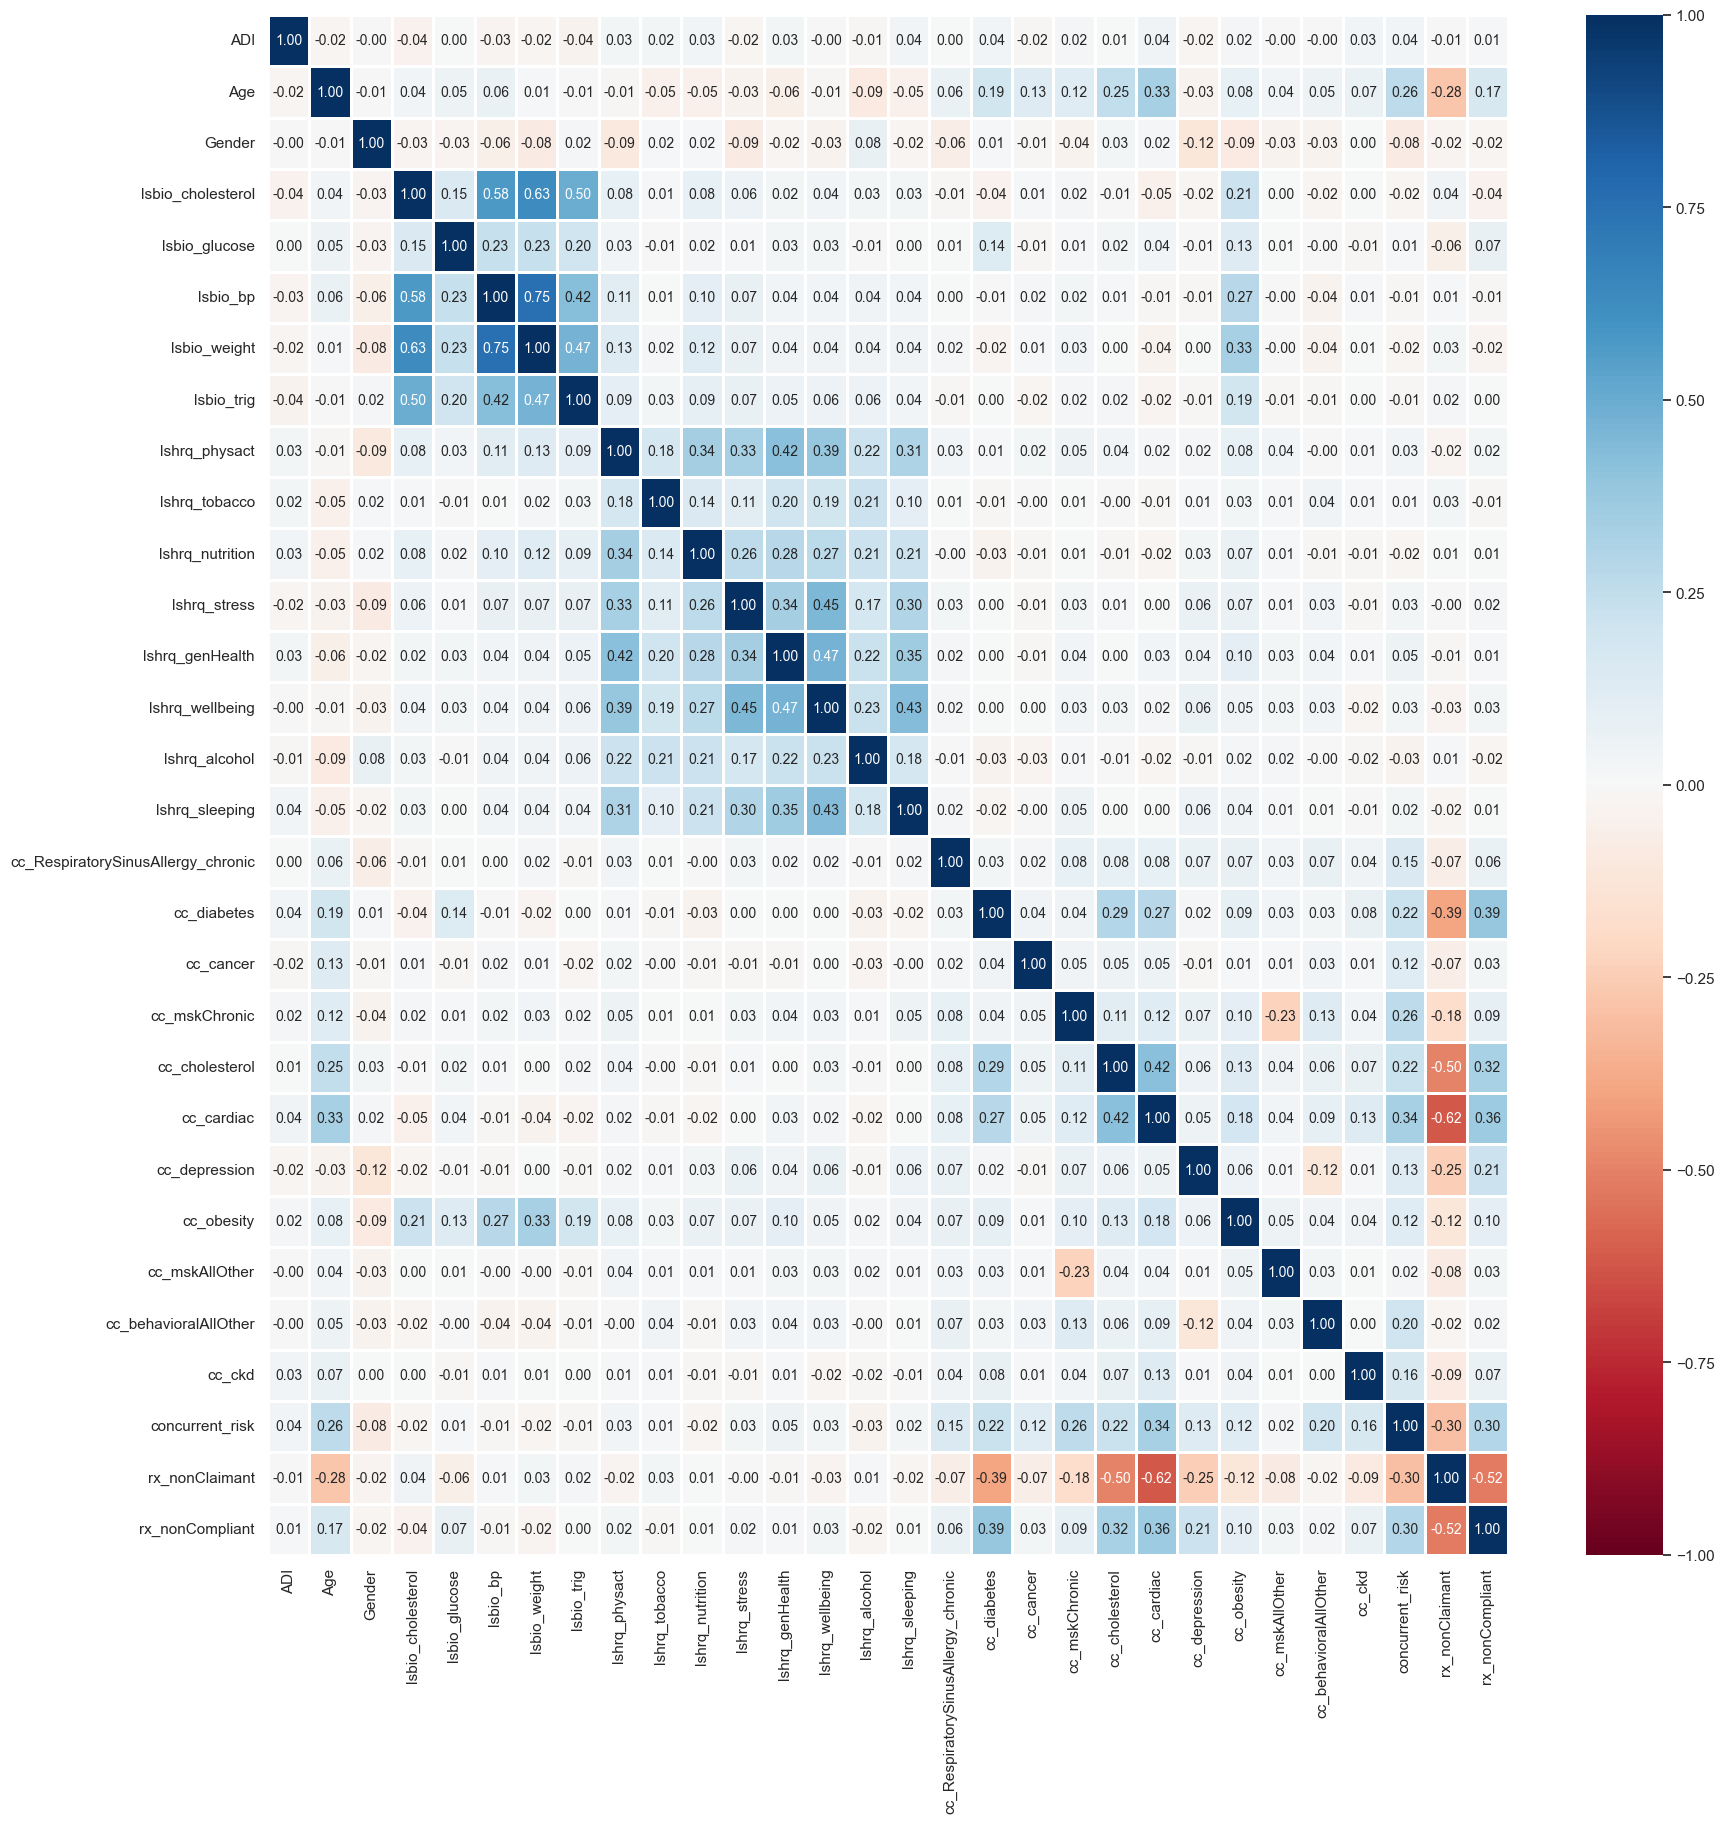

In [22]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2018['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2018[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

ord_reg = OrderedModel(y_train, x_train, distr='probit')
result = ord_reg.fit(method='bfgs')

In [23]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:     performance_rating   Log-Likelihood:                -2661.6
Model:                   OrderedModel   AIC:                             5387.
Method:            Maximum Likelihood   BIC:                             5598.
Date:                Thu, 07 Mar 2024                                         
Time:                        11:48:56                                         
No. Observations:                5436                                         
Df Residuals:                    5404                                         
Df Model:                          30                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ADI                                    0.0032      0.001      2.352      0.019     

In [24]:
from sklearn.metrics import mean_squared_error

y_train_pred = result.predict(x_train)
predicted_categories = y_train_pred.idxmax(axis=1)
train_mse = mean_squared_error(y_train, predicted_categories)

y_test_pred = result.predict(x_test)
predicted_categories = y_test_pred.idxmax(axis=1)
test_mse = mean_squared_error(y_test, predicted_categories)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Mean Squared Error (Train Dataset): 4.549484915378955
Mean Squared Error (Test Dataset): 4.570876999448428


In [25]:
significant_variable_o_2018 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_o_2018['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()

print(significant_variable_o_2018)

{'p-value': ['ADI', 'Age', 'lshrq_genHealth', 'lshrq_alcohol', 'cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'cc_obesity', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1', '2/3', '3/4']}


#### 2019

C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\2478925333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\2478925333.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


Train Set : (4788, 1) (4788, 30)
Test Set  : (1596, 1) (1596, 30)
Optimization terminated successfully.
         Current function value: 0.452245
         Iterations: 96
         Function evaluations: 98
         Gradient evaluations: 98


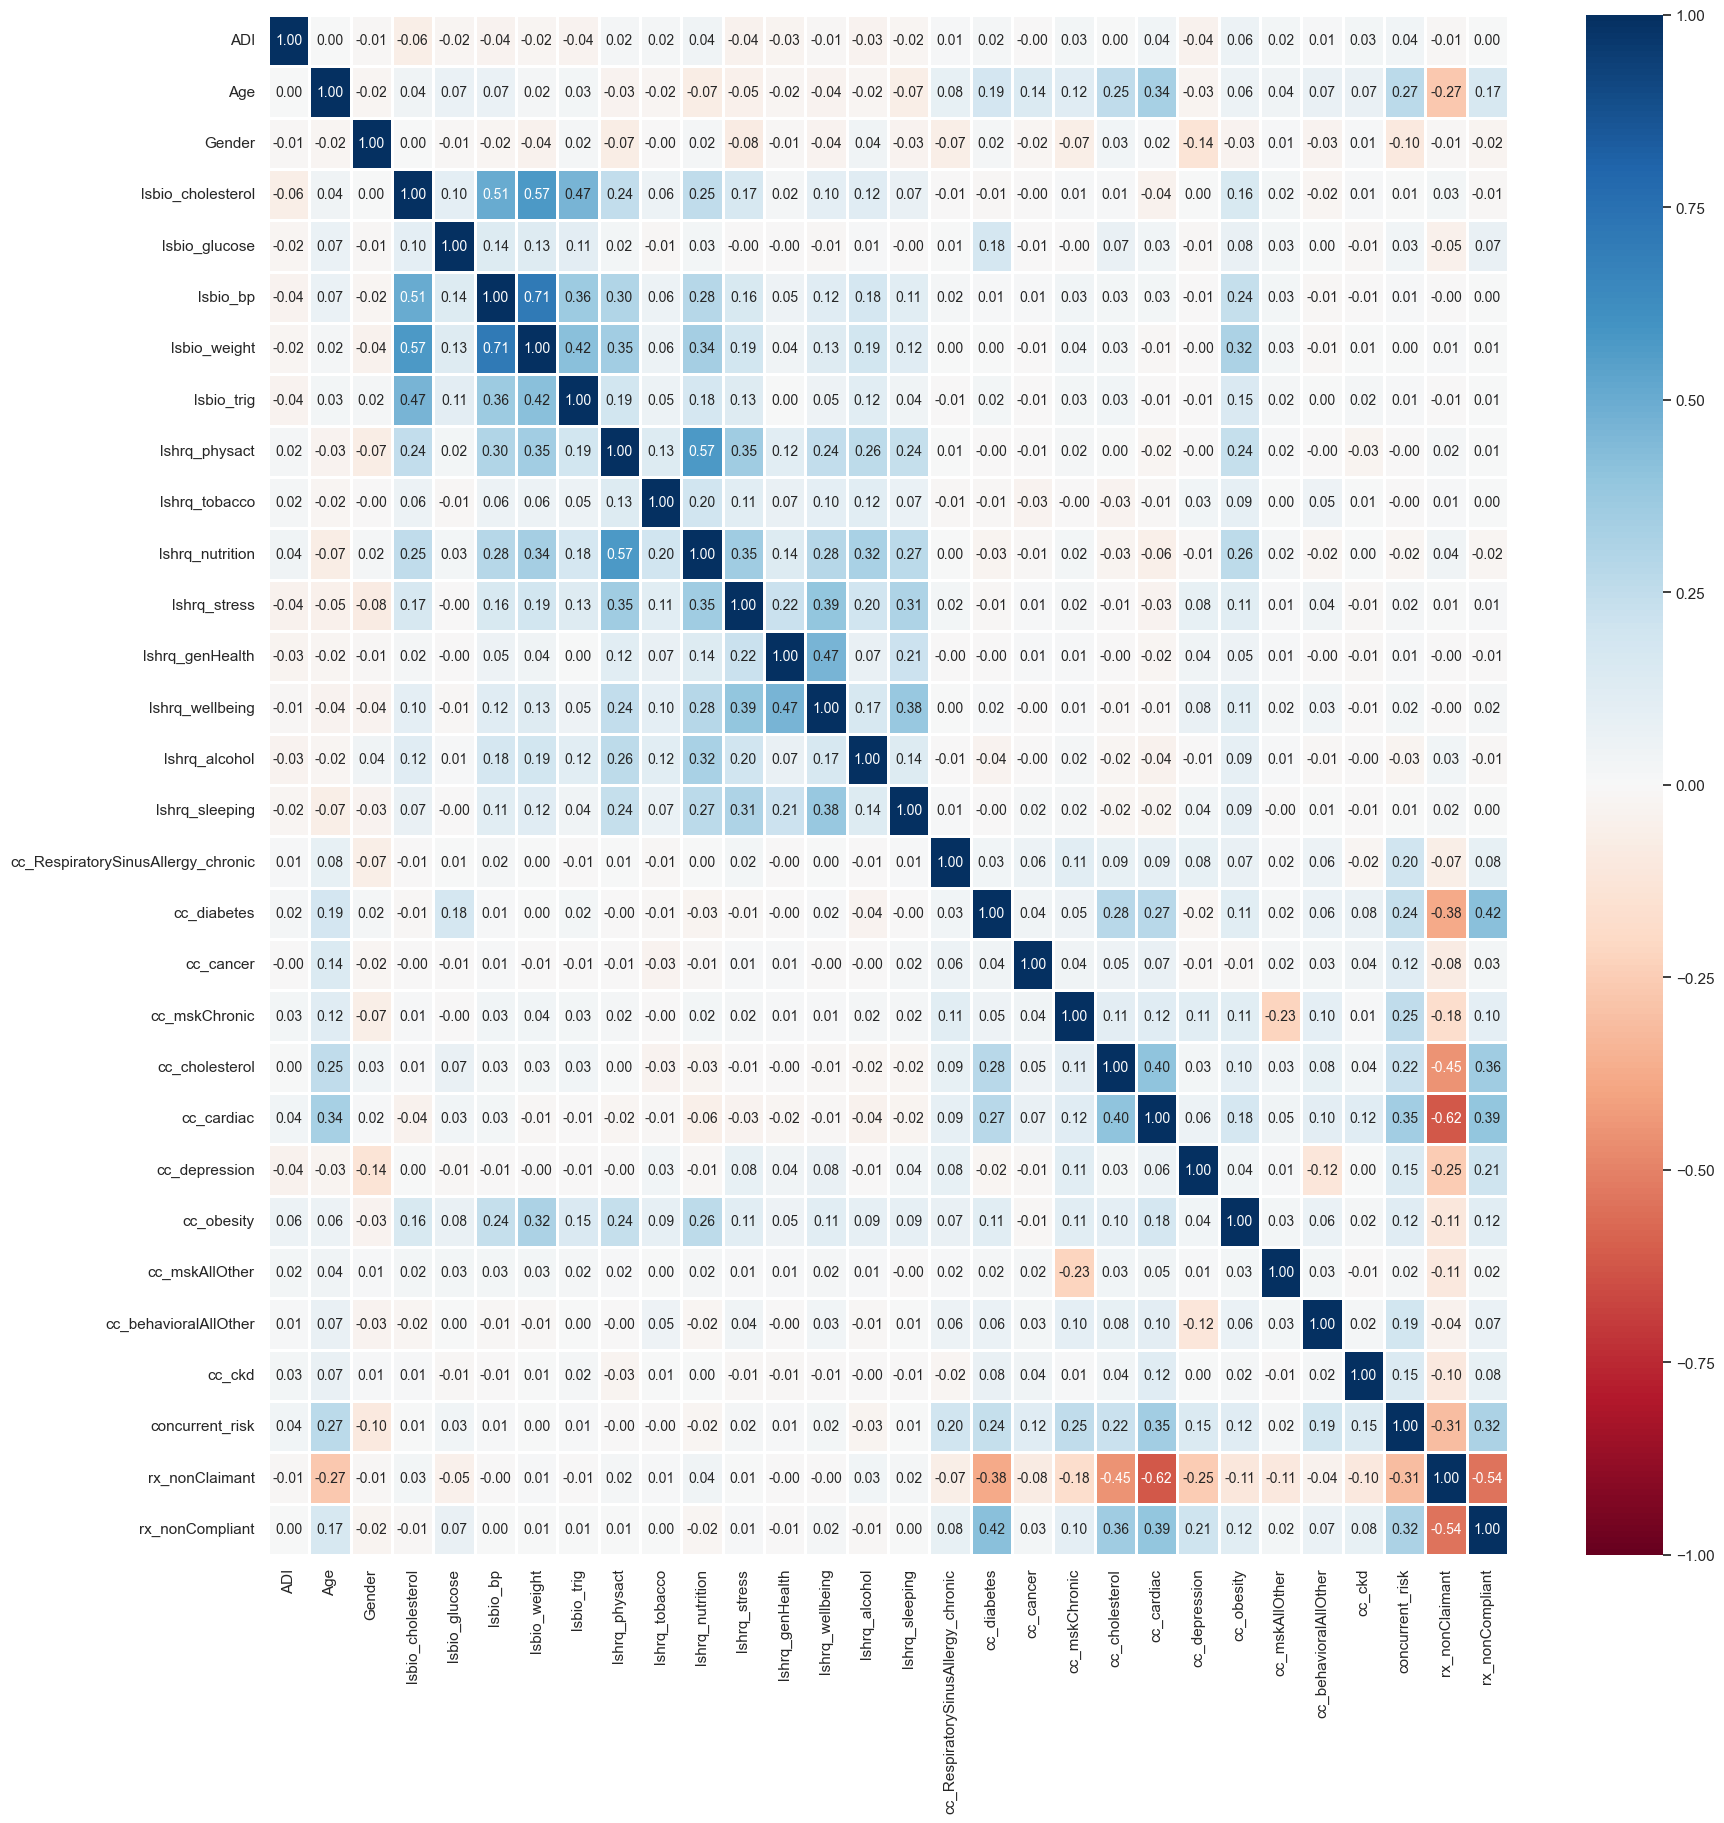

In [26]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2019['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2019[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

ord_reg = OrderedModel(y_train, x_train, distr='probit')
result = ord_reg.fit(method='bfgs')

In [27]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:     performance_rating   Log-Likelihood:                -2165.4
Model:                   OrderedModel   AIC:                             4395.
Method:            Maximum Likelihood   BIC:                             4602.
Date:                Thu, 07 Mar 2024                                         
Time:                        11:49:04                                         
No. Observations:                4788                                         
Df Residuals:                    4756                                         
Df Model:                          30                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ADI                                    0.0045      0.001      2.988      0.003     

In [28]:
from sklearn.metrics import mean_squared_error

y_train_pred = result.predict(x_train)
predicted_categories = y_train_pred.idxmax(axis=1)
train_mse = mean_squared_error(y_train, predicted_categories)

y_test_pred = result.predict(x_test)
predicted_categories = y_test_pred.idxmax(axis=1)
test_mse = mean_squared_error(y_test, predicted_categories)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Mean Squared Error (Train Dataset): 4.507936507936508
Mean Squared Error (Test Dataset): 4.568922305764411


In [29]:
significant_variable_o_2019 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_o_2019['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()

print(significant_variable_o_2019)

{'p-value': ['ADI', 'Age', 'lsbio_glucose', 'lsbio_bp', 'lshrq_physact', 'lshrq_nutrition', 'lshrq_sleeping', 'cc_mskChronic', 'rx_nonCompliant', 'Gender_1', '2/3', '3/4']}


#### 2020

C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\1930513062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\1930513062.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


Train Set : (4492, 1) (4492, 30)
Test Set  : (1498, 1) (1498, 30)
Optimization terminated successfully.
         Current function value: 0.446504
         Iterations: 91
         Function evaluations: 94
         Gradient evaluations: 94


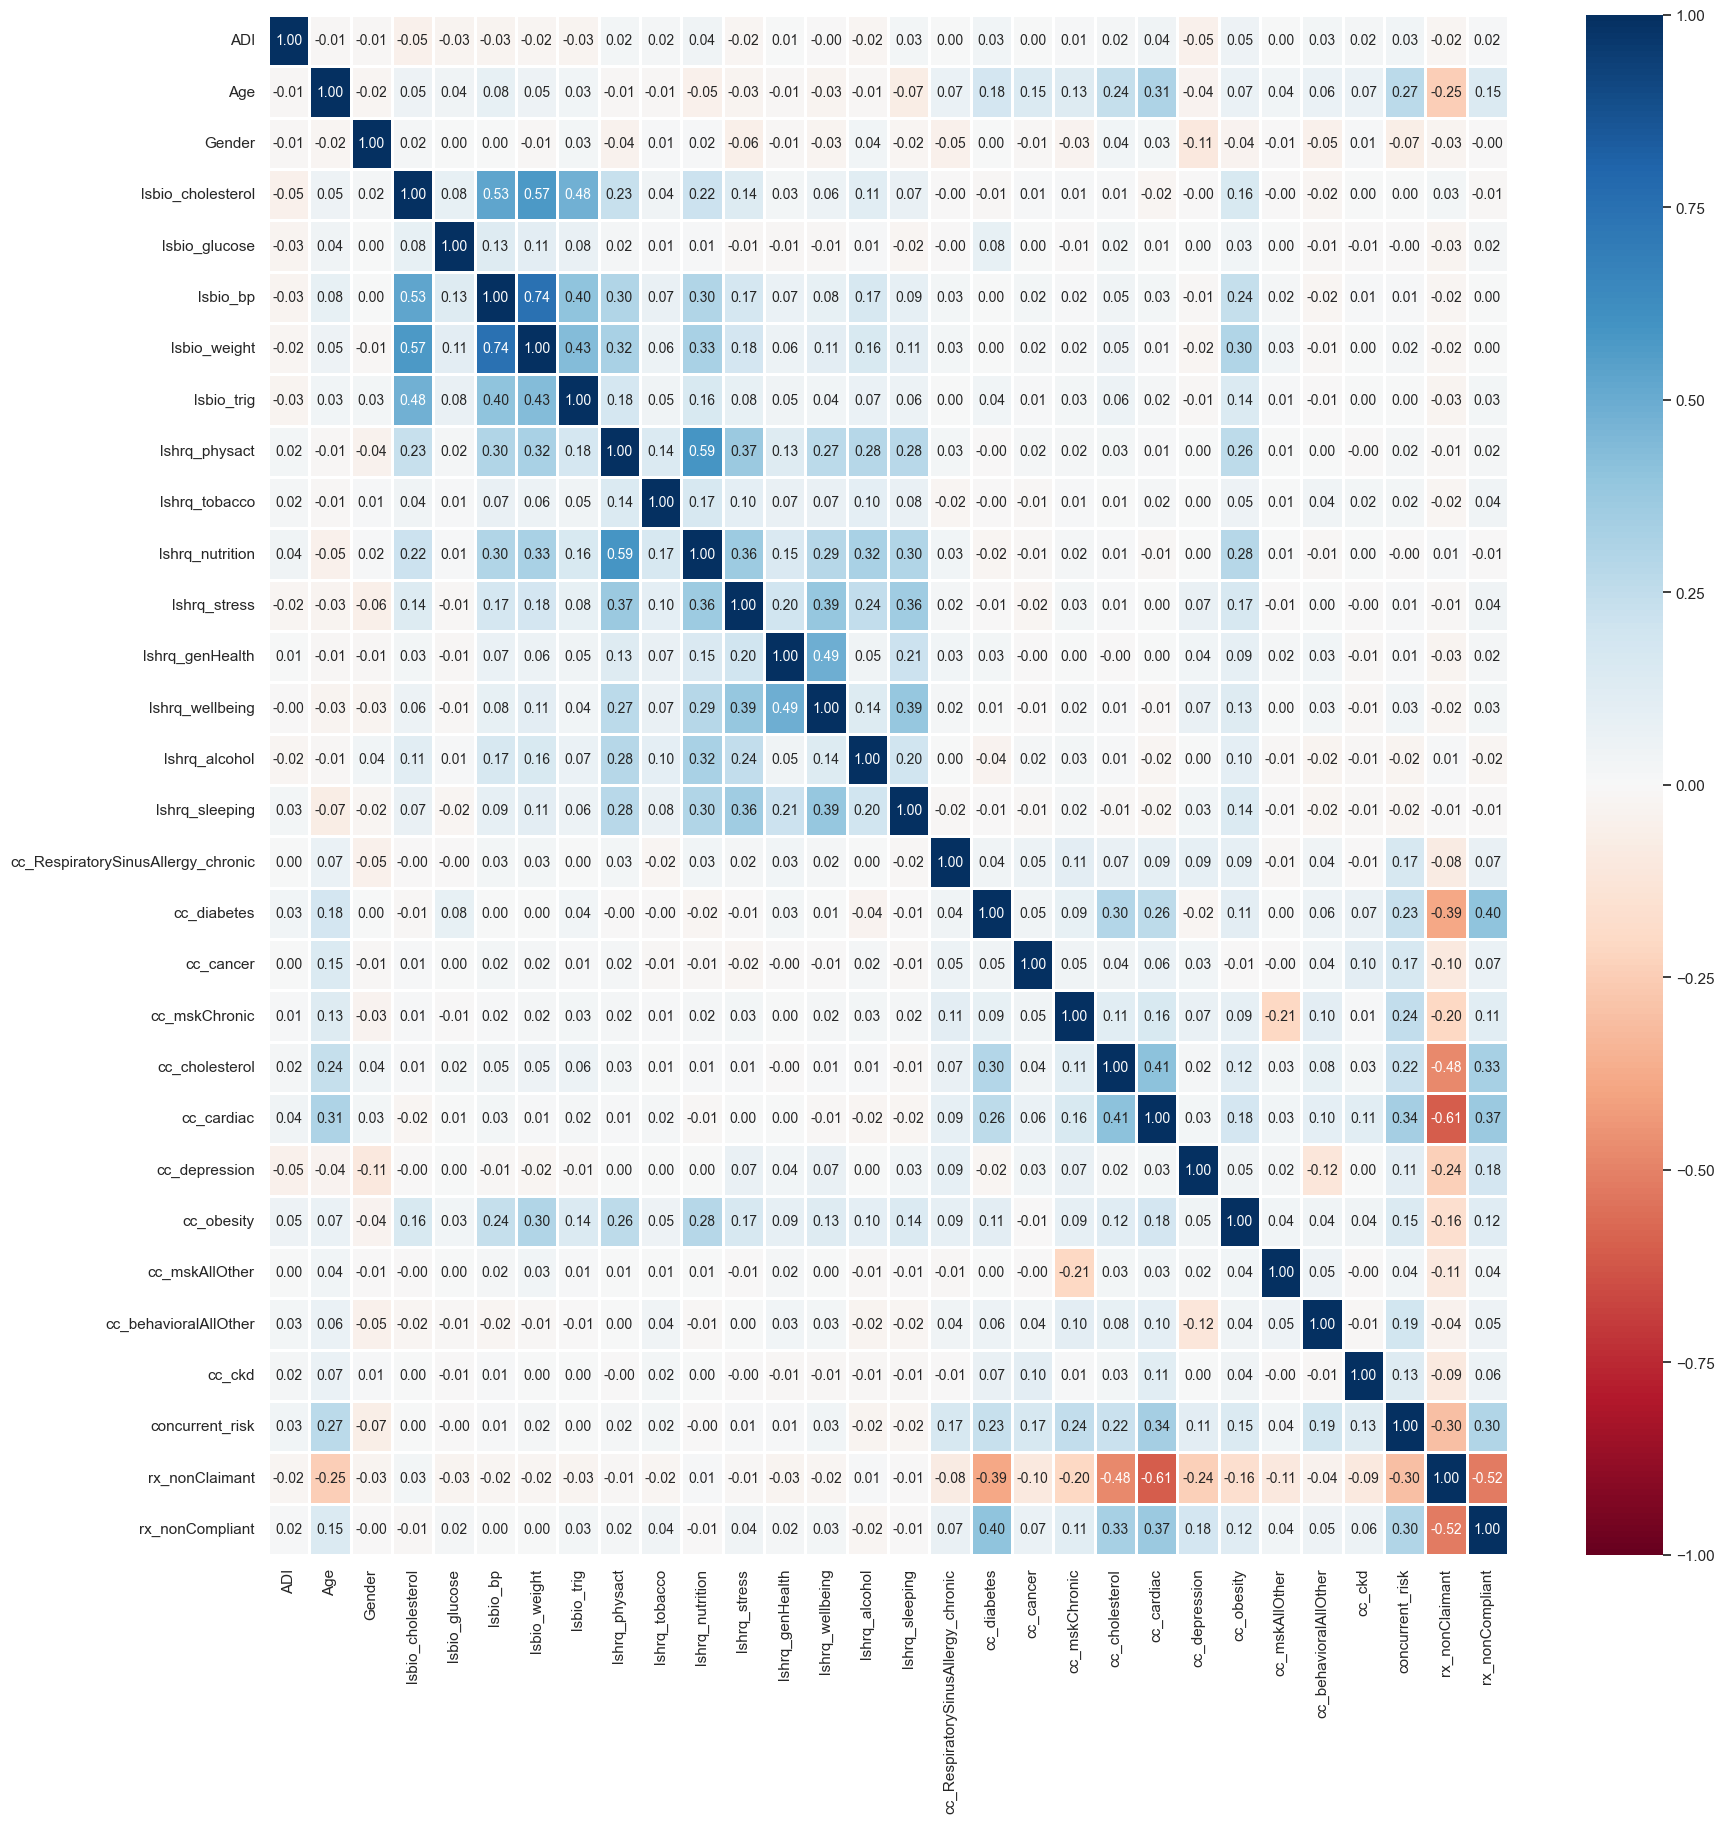

In [30]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2020['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2020[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

ord_reg = OrderedModel(y_train, x_train, distr='probit')
result = ord_reg.fit(method='bfgs')

In [31]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:     performance_rating   Log-Likelihood:                -2005.7
Model:                   OrderedModel   AIC:                             4075.
Method:            Maximum Likelihood   BIC:                             4281.
Date:                Thu, 07 Mar 2024                                         
Time:                        11:49:11                                         
No. Observations:                4492                                         
Df Residuals:                    4460                                         
Df Model:                          30                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ADI                                    0.0071      0.002      4.515      0.000     

In [32]:
from sklearn.metrics import mean_squared_error

y_train_pred = result.predict(x_train)
predicted_categories = y_train_pred.idxmax(axis=1)
train_mse = mean_squared_error(y_train, predicted_categories)

y_test_pred = result.predict(x_test)
predicted_categories = y_test_pred.idxmax(axis=1)
test_mse = mean_squared_error(y_test, predicted_categories)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Mean Squared Error (Train Dataset): 4.580587711487088
Mean Squared Error (Test Dataset): 4.6281708945260345


In [33]:
significant_variable_o_2020 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_o_2020['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()

print(significant_variable_o_2020)

{'p-value': ['ADI', 'Age', 'lsbio_cholesterol', 'lshrq_physact', 'lshrq_nutrition', 'cc_obesity', 'Gender_1', '2/3', '3/4']}


#### Compare significant variables

In [34]:
print('2018: {}'.format(significant_variable_o_2018))
print('2019: {}'.format(significant_variable_o_2019))
print('2020: {}'.format(significant_variable_o_2020))

2018: {'p-value': ['ADI', 'Age', 'lshrq_genHealth', 'lshrq_alcohol', 'cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'cc_obesity', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1', '2/3', '3/4']}
2019: {'p-value': ['ADI', 'Age', 'lsbio_glucose', 'lsbio_bp', 'lshrq_physact', 'lshrq_nutrition', 'lshrq_sleeping', 'cc_mskChronic', 'rx_nonCompliant', 'Gender_1', '2/3', '3/4']}
2020: {'p-value': ['ADI', 'Age', 'lsbio_cholesterol', 'lshrq_physact', 'lshrq_nutrition', 'cc_obesity', 'Gender_1', '2/3', '3/4']}


In [35]:
from collections import Counter

low_pvalues = sum([d['p-value'] for d in [significant_variable_o_2018, significant_variable_o_2019, significant_variable_o_2020]], [])

low_pvalues_count = Counter(low_pvalues)

print("Low p-value Counts: {}".format(low_pvalues_count))

Low p-value Counts: Counter({'ADI': 3, 'Age': 3, 'Gender_1': 3, '2/3': 3, '3/4': 3, 'cc_mskChronic': 2, 'cc_obesity': 2, 'lshrq_physact': 2, 'lshrq_nutrition': 2, 'lshrq_genHealth': 1, 'lshrq_alcohol': 1, 'cc_RespiratorySinusAllergy_chronic': 1, 'cc_mskAllOther': 1, 'cc_ckd': 1, 'concurrent_risk': 1, 'lsbio_glucose': 1, 'lsbio_bp': 1, 'lshrq_sleeping': 1, 'rx_nonCompliant': 1, 'lsbio_cholesterol': 1})


### Decision Tree Regressor

#### 2018

In [36]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2018['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2018[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Train Set : (5436, 1) (5436, 30)
Test Set  : (1813, 1) (1813, 30)
Mean Squared Error (Train Dataset): 0.14153299093519114
Mean Squared Error (Test Dataset): 0.13798282647072813


C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\999660366.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\999660366.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


In [37]:
significant_variable_dt_2018 = {}
significant_variable_dt_2018['significant_variables'] = []
fr = decisiontreemodel.feature_importances_ 
importance_dict = dict(zip(df.columns, fr))
for key in importance_dict:
    if importance_dict[key] > 0:
        significant_variable_dt_2018['significant_variables'].append(key)
        
print(significant_variable_dt_2018)

{'significant_variables': ['ADI', 'Age', 'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes']}


[Text(0.5, 0.875, 'ADI <= 14.5\nsquared_error = 0.144\nsamples = 5436\nvalue = 3.105'),
 Text(0.25, 0.625, 'Age <= 74.5\nsquared_error = 0.089\nsamples = 684\nvalue = 3.038'),
 Text(0.125, 0.375, 'Age <= 60.5\nsquared_error = 0.088\nsamples = 682\nvalue = 3.04'),
 Text(0.0625, 0.125, 'squared_error = 0.078\nsamples = 608\nvalue = 3.03'),
 Text(0.1875, 0.125, 'squared_error = 0.161\nsamples = 74\nvalue = 3.122'),
 Text(0.375, 0.375, 'rx_nonClaimant <= 0.5\nsquared_error = 0.25\nsamples = 2\nvalue = 2.5'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.75, 0.625, 'Age <= 36.5\nsquared_error = 0.151\nsamples = 4752\nvalue = 3.115'),
 Text(0.625, 0.375, 'concurrent_risk <= 9.5\nsquared_error = 0.092\nsamples = 1200\nvalue = 3.067'),
 Text(0.5625, 0.125, 'squared_error = 0.092\nsamples = 1199\nvalue = 3.066'),
 Text(0.6875, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.8

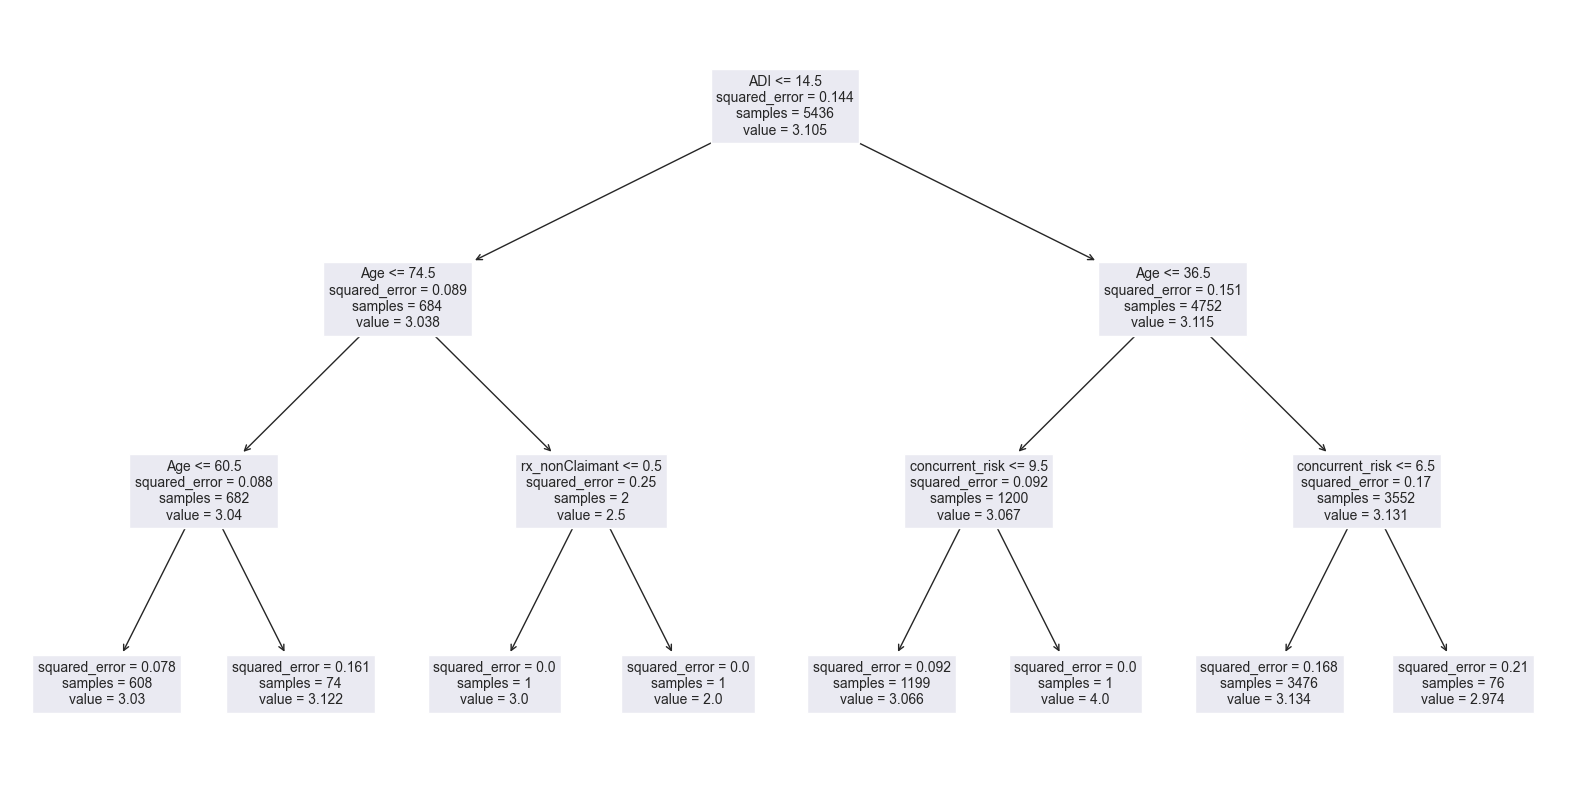

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(20, 10)) 
tree.plot_tree(decisiontreemodel, fontsize=10, feature_names=x_train.columns)

#### 2019

In [39]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2019['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2019[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Train Set : (4788, 1) (4788, 30)
Test Set  : (1596, 1) (1596, 30)
Mean Squared Error (Train Dataset): 0.12604675878118995
Mean Squared Error (Test Dataset): 0.13655211325748576


C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\2821825730.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\2821825730.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


In [40]:
significant_variable_dt_2019 = {}
significant_variable_dt_2019['significant_variables'] = []
fr = decisiontreemodel.feature_importances_ 
importance_dict = dict(zip(df.columns, fr))
for key in importance_dict:
    if importance_dict[key] > 0:
        significant_variable_dt_2019['significant_variables'].append(key)
        
print(significant_variable_dt_2019)

{'significant_variables': ['ADI', 'Age', 'BiometricScreeningParticipants', 'HRQParticipants', 'cc_RespiratorySinusAllergy_chronic']}


[Text(0.5, 0.875, 'ADI <= 12.5\nsquared_error = 0.128\nsamples = 4788\nvalue = 3.095'),
 Text(0.25, 0.625, 'concurrent_risk <= 9.0\nsquared_error = 0.068\nsamples = 457\nvalue = 3.015'),
 Text(0.125, 0.375, 'lshrq_genHealth <= 0.5\nsquared_error = 0.066\nsamples = 455\nvalue = 3.013'),
 Text(0.0625, 0.125, 'squared_error = 0.063\nsamples = 445\nvalue = 3.009'),
 Text(0.1875, 0.125, 'squared_error = 0.16\nsamples = 10\nvalue = 3.2'),
 Text(0.375, 0.375, 'lshrq_wellbeing <= 0.5\nsquared_error = 0.25\nsamples = 2\nvalue = 3.5'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 3.0'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.75, 0.625, 'ADI <= 39.5\nsquared_error = 0.134\nsamples = 4331\nvalue = 3.103'),
 Text(0.625, 0.375, 'Age <= 37.5\nsquared_error = 0.127\nsamples = 3228\nvalue = 3.09'),
 Text(0.5625, 0.125, 'squared_error = 0.094\nsamples = 926\nvalue = 3.058'),
 Text(0.6875, 0.125, 'squared_error = 0.14\nsamples = 2302\nvalue = 3.1

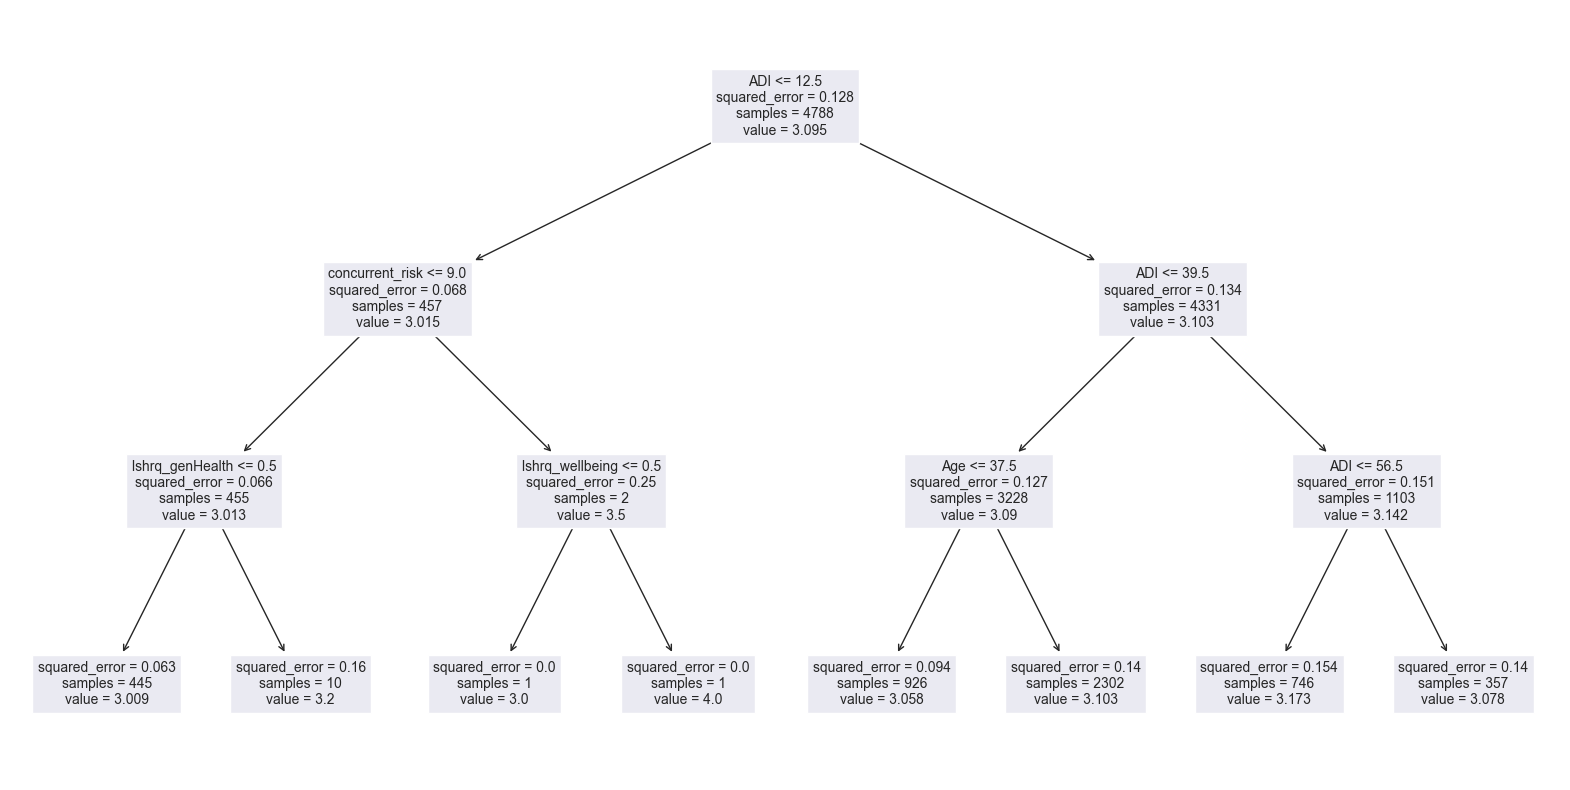

In [41]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(20, 10)) 
tree.plot_tree(decisiontreemodel, fontsize=10, feature_names=x_train.columns)

#### 2020

In [42]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2020['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2020[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Train Set : (4492, 1) (4492, 30)
Test Set  : (1498, 1) (1498, 30)
Mean Squared Error (Train Dataset): 0.12836186276961292
Mean Squared Error (Test Dataset): 0.12785986026644786


C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\770285336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\770285336.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


In [43]:
significant_variable_dt_2020 = {}
significant_variable_dt_2020['significant_variables'] = []
fr = decisiontreemodel.feature_importances_ 
importance_dict = dict(zip(df.columns, fr))
for key in importance_dict:
    if importance_dict[key] > 0:
        significant_variable_dt_2020['significant_variables'].append(key)
        
print(significant_variable_dt_2020)

{'significant_variables': ['ADI', 'Age', 'analytic_period_id']}


[Text(0.5, 0.875, 'Age <= 39.5\nsquared_error = 0.131\nsamples = 4492\nvalue = 3.113'),
 Text(0.25, 0.625, 'ADI <= 40.5\nsquared_error = 0.096\nsamples = 1331\nvalue = 3.069'),
 Text(0.125, 0.375, 'Age <= 31.5\nsquared_error = 0.083\nsamples = 1045\nvalue = 3.051'),
 Text(0.0625, 0.125, 'squared_error = 0.074\nsamples = 325\nvalue = 3.018'),
 Text(0.1875, 0.125, 'squared_error = 0.086\nsamples = 720\nvalue = 3.065'),
 Text(0.375, 0.375, 'lsbio_trig <= 0.5\nsquared_error = 0.139\nsamples = 286\nvalue = 3.136'),
 Text(0.3125, 0.125, 'squared_error = 0.141\nsamples = 269\nvalue = 3.149'),
 Text(0.4375, 0.125, 'squared_error = 0.055\nsamples = 17\nvalue = 2.941'),
 Text(0.75, 0.625, 'Age <= 60.5\nsquared_error = 0.145\nsamples = 3161\nvalue = 3.132'),
 Text(0.625, 0.375, 'ADI <= 25.5\nsquared_error = 0.149\nsamples = 2780\nvalue = 3.142'),
 Text(0.5625, 0.125, 'squared_error = 0.114\nsamples = 1206\nvalue = 3.112'),
 Text(0.6875, 0.125, 'squared_error = 0.174\nsamples = 1574\nvalue = 3.166

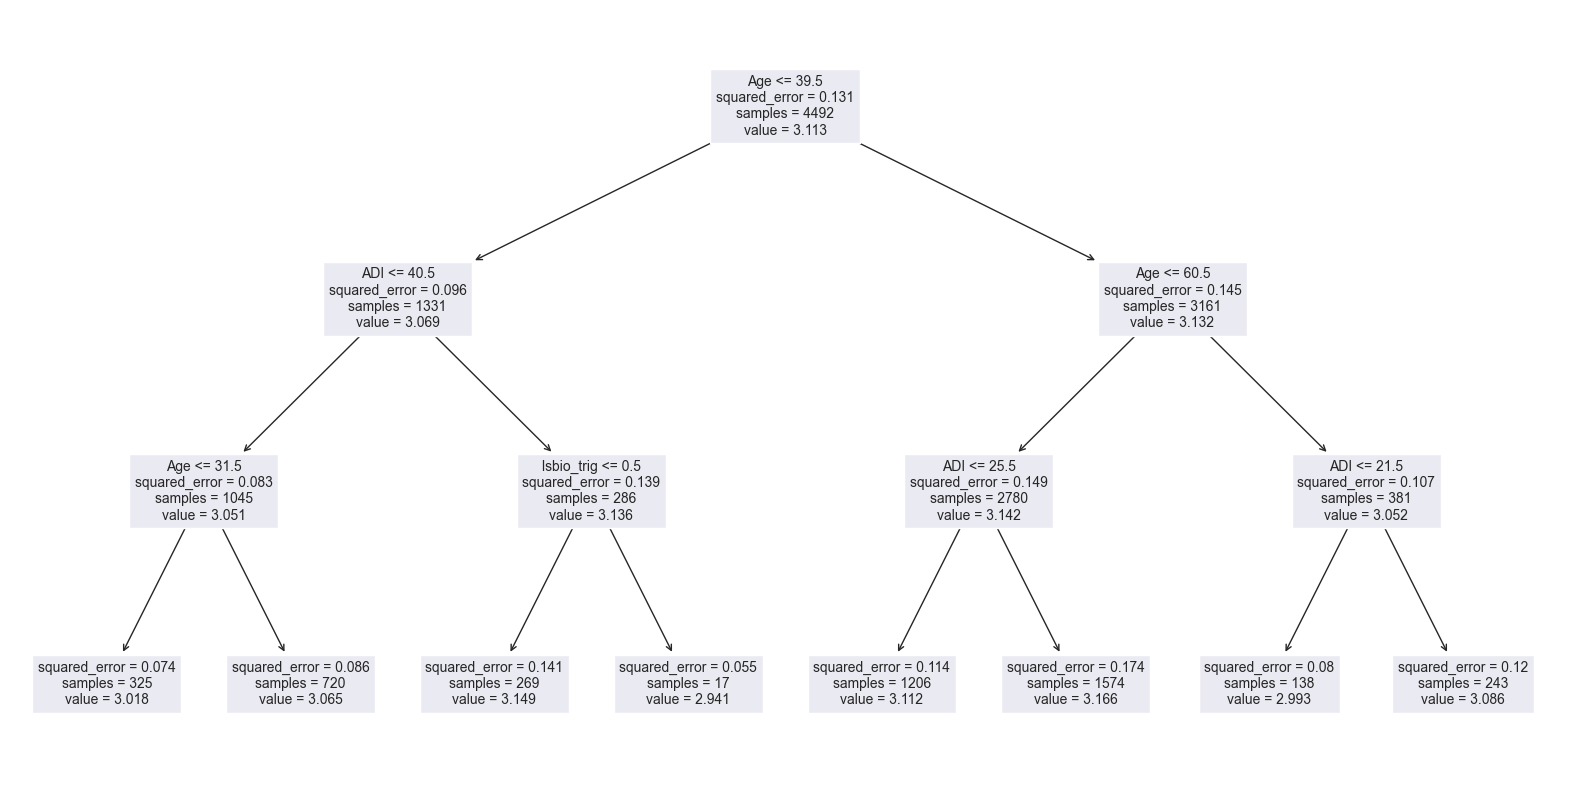

In [44]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(20, 10)) 
tree.plot_tree(decisiontreemodel, fontsize=10, feature_names=x_train.columns)

#### Compare significant variables

In [45]:
print('2018: {}'.format(significant_variable_dt_2018))
print('2019: {}'.format(significant_variable_dt_2019))
print('2020: {}'.format(significant_variable_dt_2020))

2018: {'significant_variables': ['ADI', 'Age', 'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes']}
2019: {'significant_variables': ['ADI', 'Age', 'BiometricScreeningParticipants', 'HRQParticipants', 'cc_RespiratorySinusAllergy_chronic']}
2020: {'significant_variables': ['ADI', 'Age', 'analytic_period_id']}


In [46]:
from collections import Counter

sv = sum([d['significant_variables'] for d in [significant_variable_dt_2018, significant_variable_dt_2019, significant_variable_dt_2020]], [])

sv_count = Counter(sv)

print("Significant Variables Counts: {}".format(sv_count))

Significant Variables Counts: Counter({'ADI': 3, 'Age': 3, 'cc_RespiratorySinusAllergy_chronic': 2, 'cc_diabetes': 1, 'BiometricScreeningParticipants': 1, 'HRQParticipants': 1, 'analytic_period_id': 1})


#### Everything as a whole

#### Logistic Regression

C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\1717512406.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\1717512406.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed w

Train Set : (14717, 1) (14717, 30)
Test Set  : (4906, 1) (4906, 30)
Intercept of Regression 	: b =  [-0.46897991  1.28490874 -0.81592883]
                            Predictors  Coefficients
0                                  ADI     -0.006342
1                                  Age     -0.017934
2                    lsbio_cholesterol      0.056815
3                        lsbio_glucose      0.033399
4                             lsbio_bp     -0.021307
5                         lsbio_weight     -0.075657
6                           lsbio_trig     -0.043891
7                        lshrq_physact     -0.149332
8                        lshrq_tobacco     -0.053355
9                      lshrq_nutrition     -0.173621
10                        lshrq_stress     -0.033218
11                     lshrq_genHealth     -0.063133
12                     lshrq_wellbeing     -0.002154
13                       lshrq_alcohol     -0.104712
14                      lshrq_sleeping      0.020842
15  cc_Respira

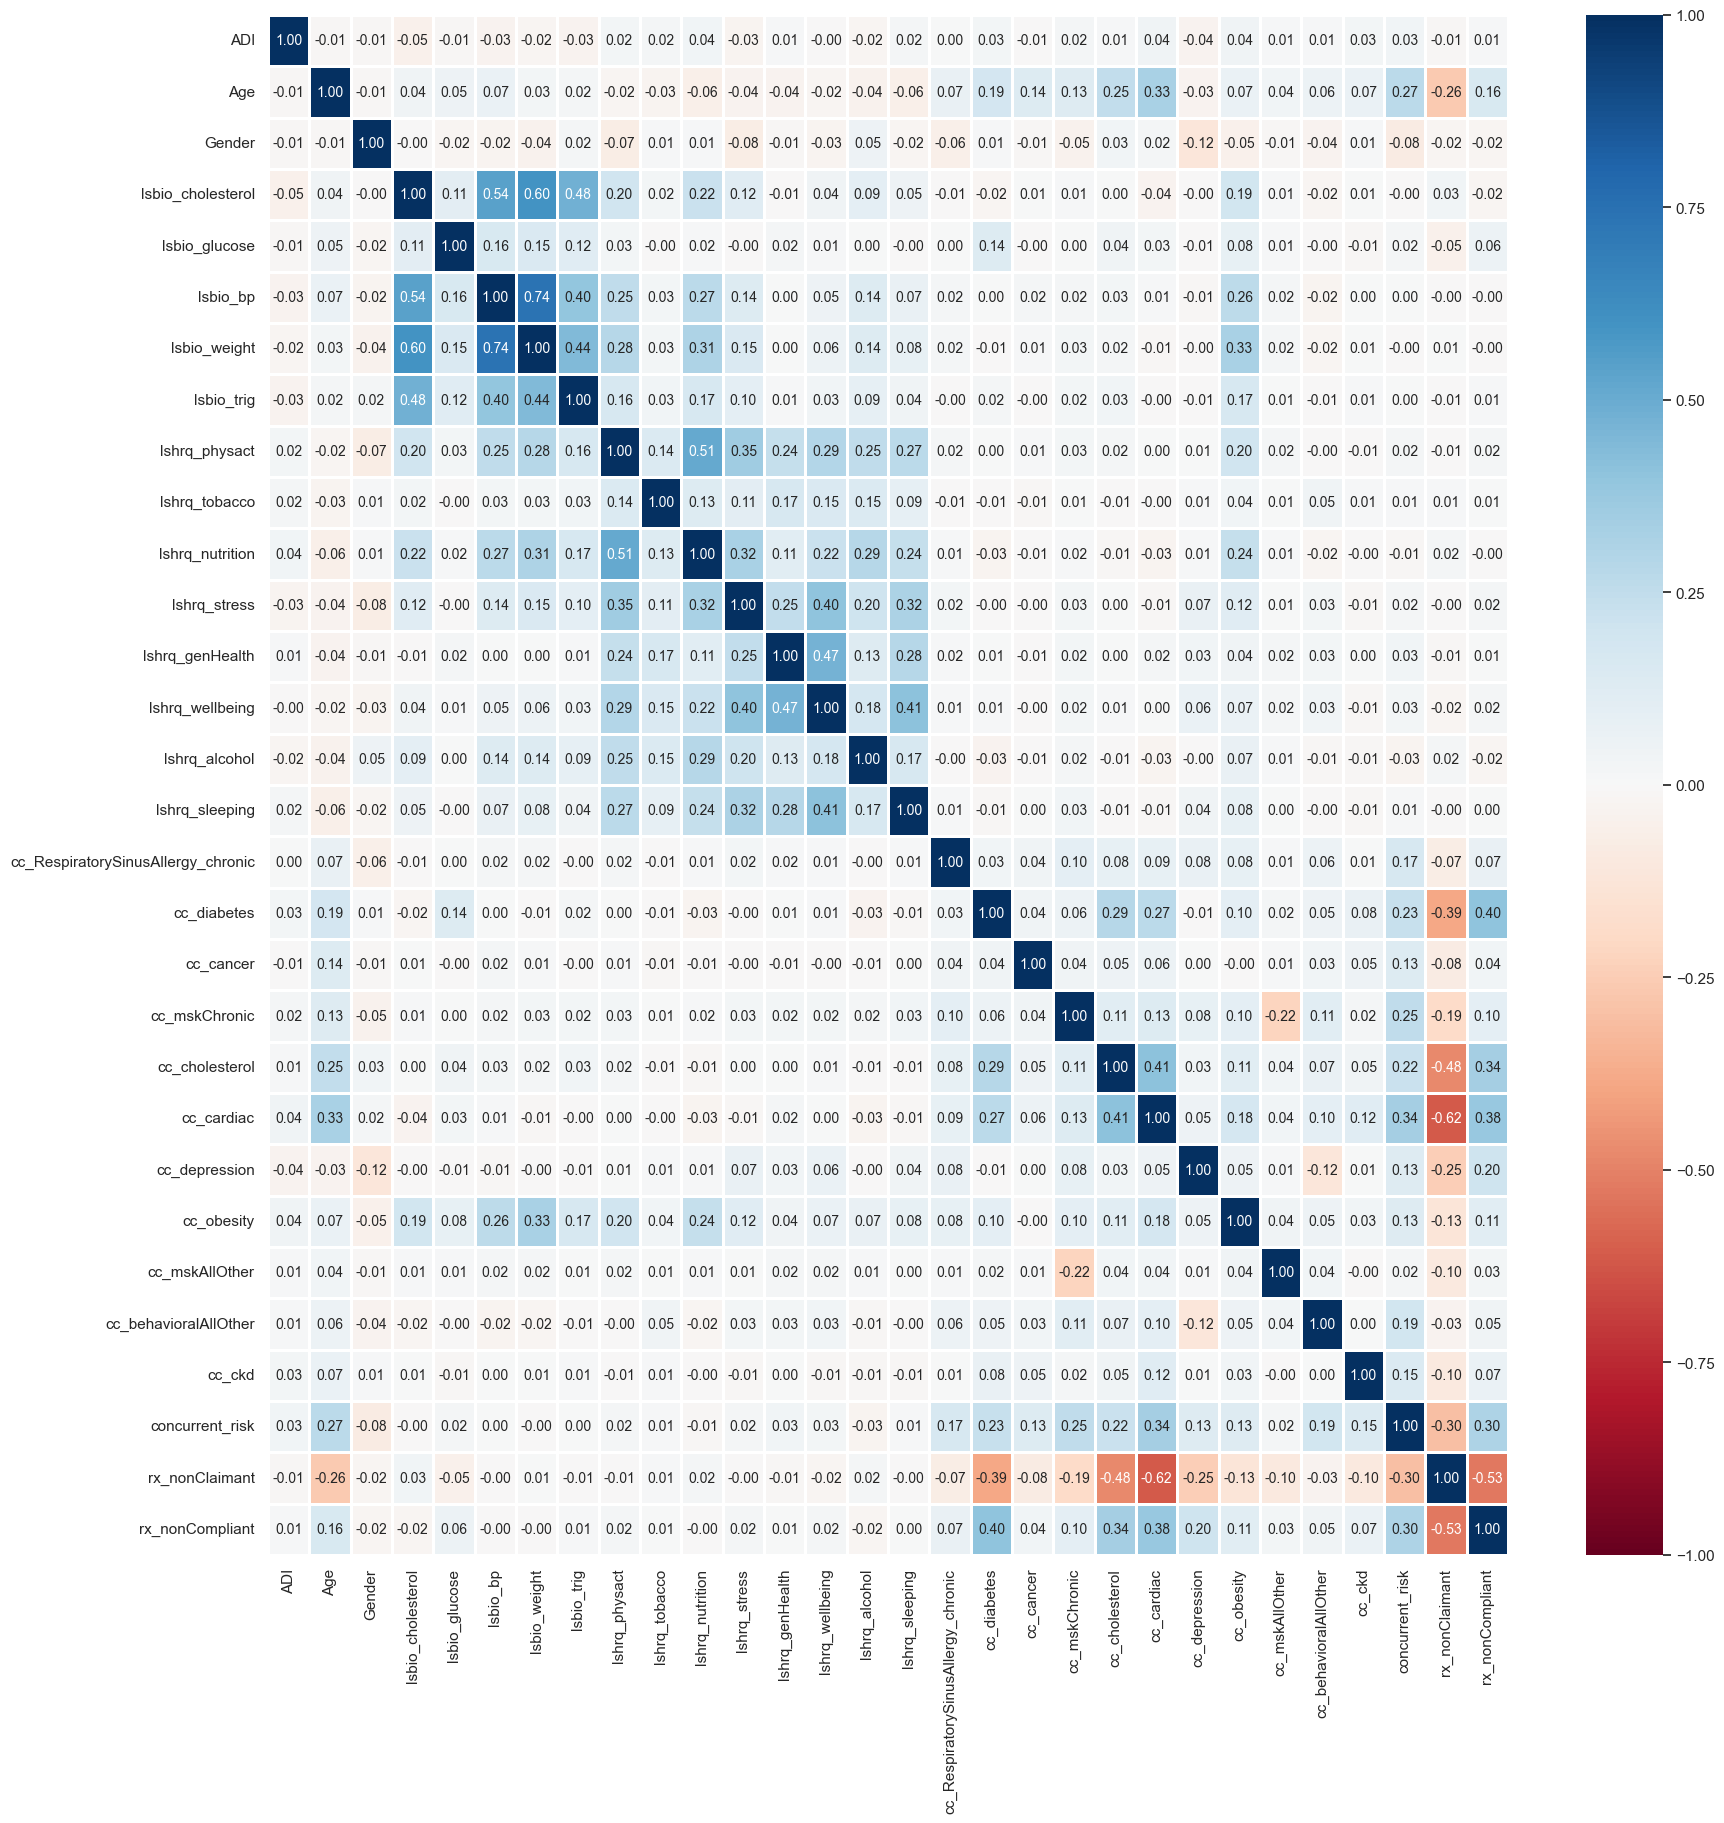

In [47]:
df_P = df.loc[(df.Subgroup=='Subgroup P')]

health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_P['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_P[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [48]:
# check vif data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif_constant = sm.add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif_constant.values, i) for i in range(x_vif_constant.shape[1])]

vif_data

Variable        VIF
0                                const  45.550837
1                                  ADI   1.017189
2                                  Age   1.207763
3                    lsbio_cholesterol   1.761625
4                        lsbio_glucose   1.058373
5                             lsbio_bp   2.346708
6                         lsbio_weight   2.738688
7                           lsbio_trig   1.390047
8                        lshrq_physact   1.578673
9                        lshrq_tobacco   1.066428
10                     lshrq_nutrition   1.576807
11                        lshrq_stress   1.377199
12                     lshrq_genHealth   1.346928
13                     lshrq_wellbeing   1.575629
14                       lshrq_alcohol   1.154478
15                      lshrq_sleeping   1.293399
16  cc_RespiratorySinusAllergy_chronic   1.042890
17                         cc_diabetes   1.335620
18                           cc_cancer   1.034316
19                       cc_mskChronic   1.181481
20                      cc_cholesterol   1.393595
21                          cc_cardiac   1.838705
22                       cc_depression   1.194093
23                          cc_obesity   1.224845
24                      cc_mskAllOther   1.090429
25               cc_behavioralAllOther   1.074753
26                              cc_ckd   1.039304
27                     concurrent_risk   1.313869
28                      rx_nonClaimant   2.316920
29                     rx_nonCompliant   1.553327
30                            Gender_1   1.050893

In [49]:
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
model = sm.MNLogit(y, x_with_constant)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.465129
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:     performance_rating   No. Observations:                19623
Model:                        MNLogit   Df Residuals:                    19561
Method:                           MLE   Df Model:                           60
Date:                Thu, 07 Mar 2024   Pseudo R-squ.:                 0.02079
Time:                        11:49:15   Log-Likelihood:                -9127.2
converged:                       True   LL-Null:                       -9321.0
Covariance Type:            nonrobust   LLR p-value:                 1.980e-49
              performance_rating=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  5.5719      0.354    

In [50]:
significant_variable_whole = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'rating3', 1: 'rating4'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_whole['performance 3'] = p_value_dataframe[(p_value_dataframe['rating3'] < 0.1)].index.tolist()
significant_variable_whole['performance 4'] = p_value_dataframe[(p_value_dataframe['rating4'] < 0.1)].index.tolist()

print('Performance 3: ', significant_variable_whole['performance 3'])
print('Performance 4: ', significant_variable_whole['performance 4'])

Performance 3:  ['const', 'ADI', 'Age', 'lshrq_nutrition', 'cc_cancer', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'concurrent_risk', 'Gender_1']
Performance 4:  ['const', 'lsbio_cholesterol', 'lshrq_nutrition', 'lshrq_genHealth', 'lshrq_sleeping', 'cc_diabetes', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'concurrent_risk', 'Gender_1']


#### Ordinal Logistic Regression

C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\549401062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\549401062.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


Train Set : (14717, 1) (14717, 30)
Test Set  : (4906, 1) (4906, 30)
Optimization terminated successfully.
         Current function value: 0.476784
         Iterations: 84
         Function evaluations: 86
         Gradient evaluations: 86


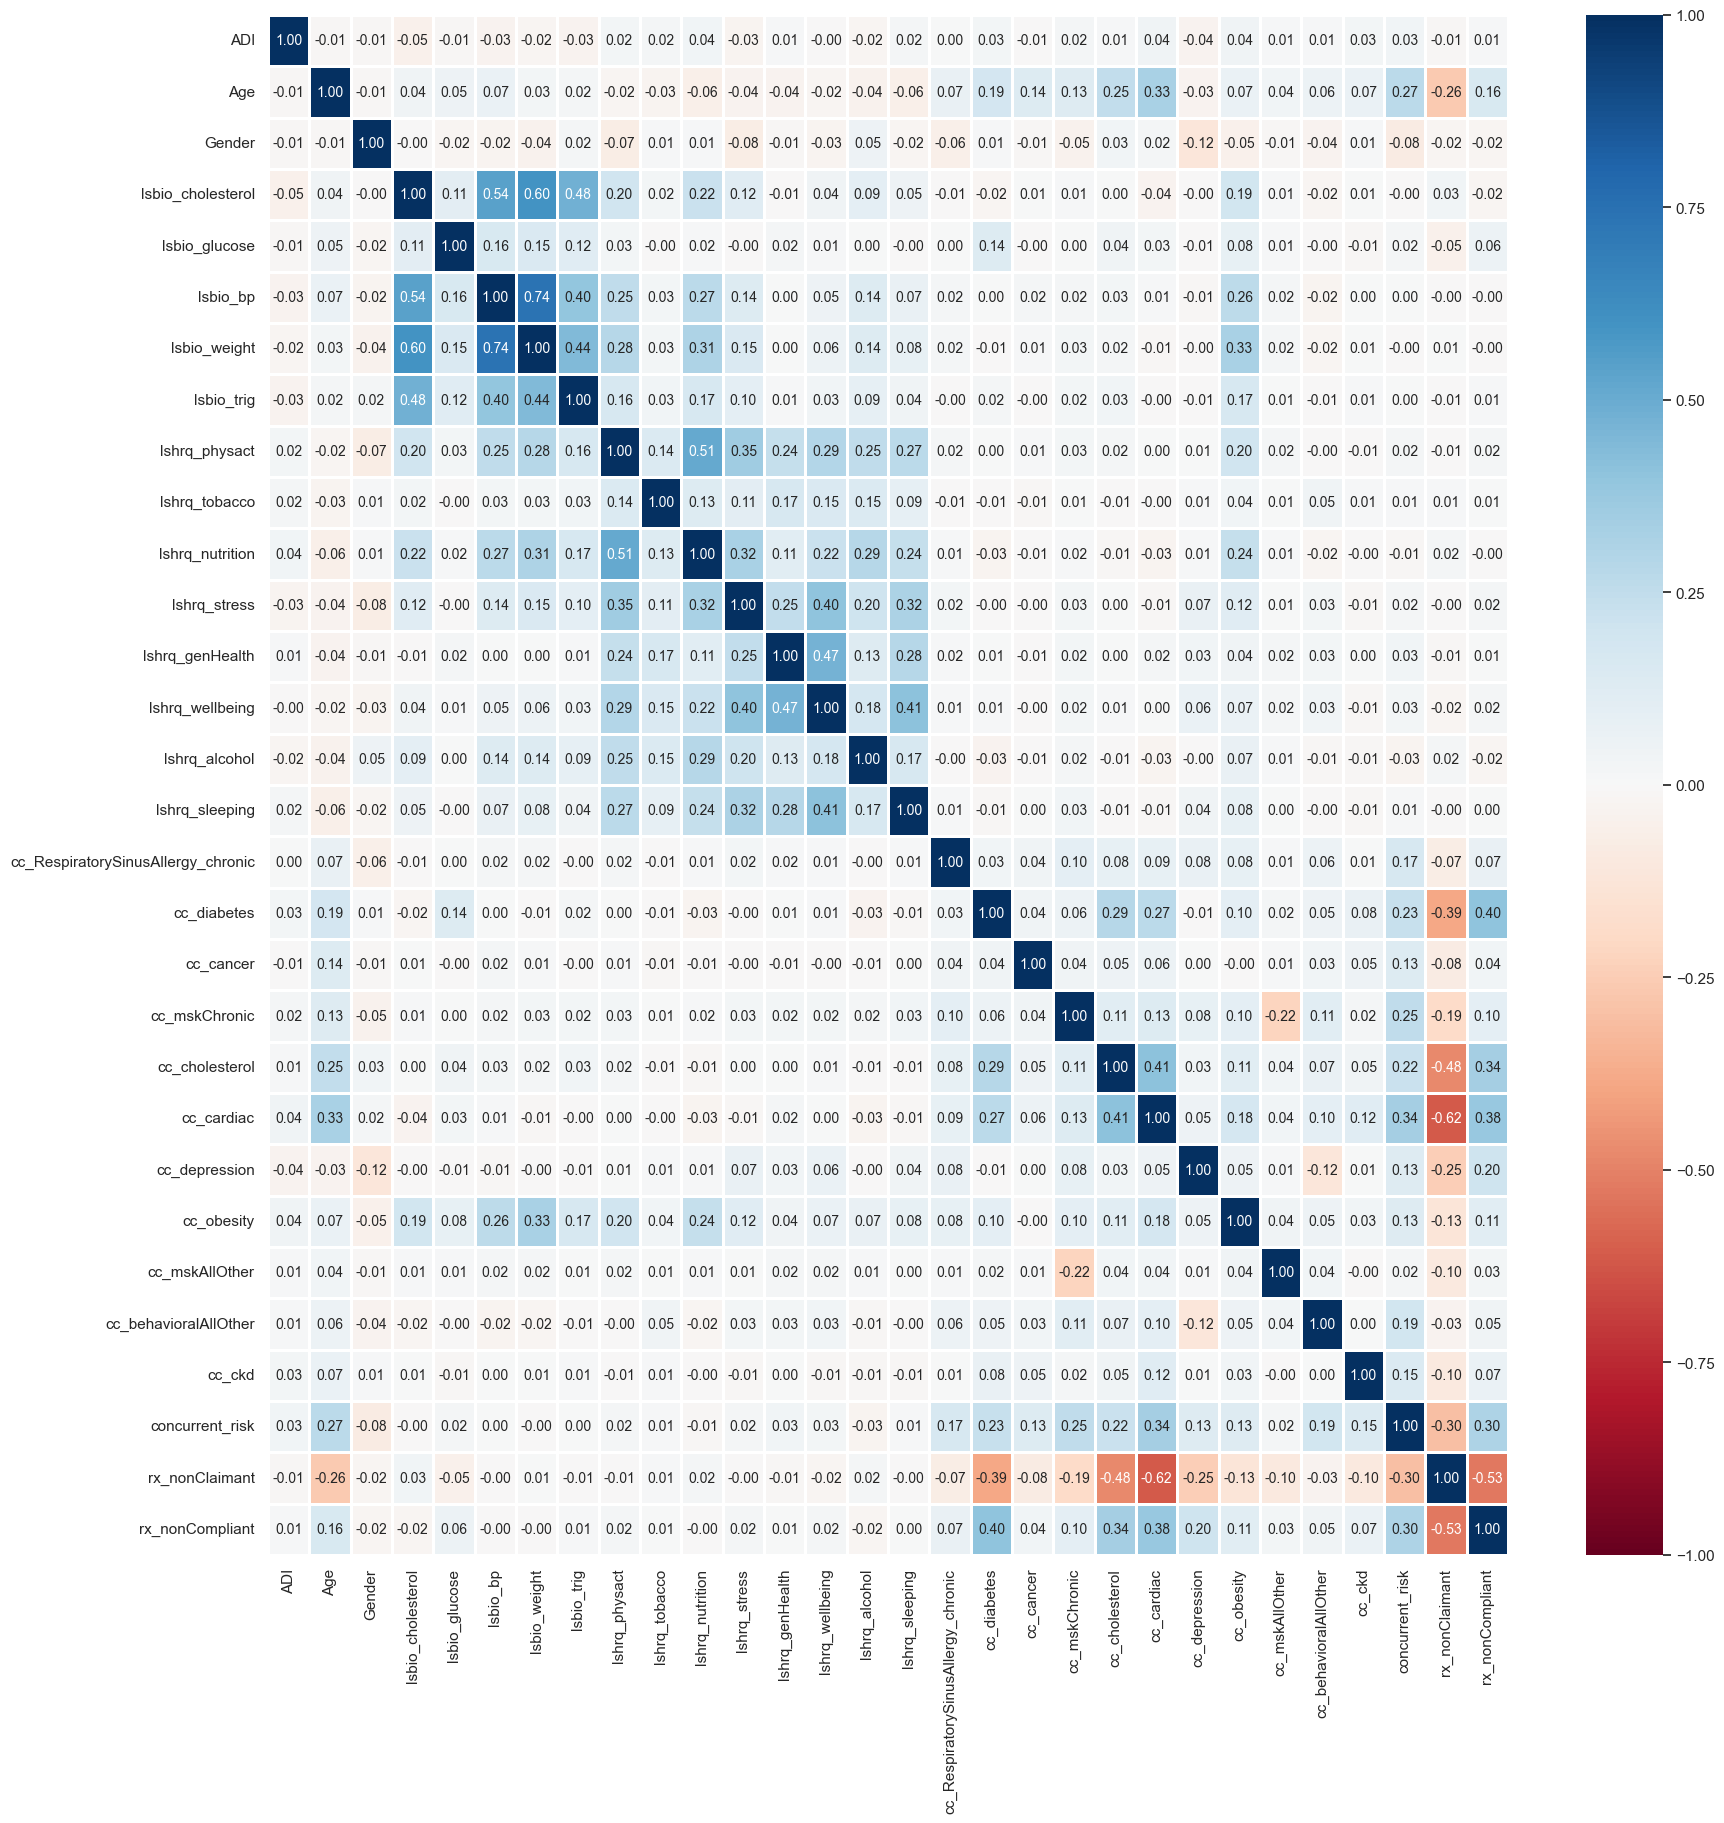

In [51]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_P['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_P[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

ord_reg = OrderedModel(y_train, x_train, distr='probit')
result = ord_reg.fit(method='bfgs')

In [52]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:     performance_rating   Log-Likelihood:                -7016.8
Model:                   OrderedModel   AIC:                         1.410e+04
Method:            Maximum Likelihood   BIC:                         1.434e+04
Date:                Thu, 07 Mar 2024                                         
Time:                        11:49:31                                         
No. Observations:               14717                                         
Df Residuals:                   14685                                         
Df Model:                          30                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ADI                                    0.0043      0.001      5.190      0.000     

In [53]:
from sklearn.metrics import mean_squared_error

y_train_pred = result.predict(x_train)
predicted_categories = y_train_pred.idxmax(axis=1)
train_mse = mean_squared_error(y_train, predicted_categories)

y_test_pred = result.predict(x_test)
predicted_categories = y_test_pred.idxmax(axis=1)
test_mse = mean_squared_error(y_test, predicted_categories)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Mean Squared Error (Train Dataset): 4.566623632533805
Mean Squared Error (Test Dataset): 4.5242560130452505


In [54]:
significant_variable_o_whole = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_o_whole['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()

print(significant_variable_o_whole)

{'p-value': ['ADI', 'Age', 'lsbio_cholesterol', 'lshrq_physact', 'lshrq_nutrition', 'lshrq_genHealth', 'lshrq_sleeping', 'cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'cc_mskAllOther', 'concurrent_risk', 'Gender_1', '2/3', '3/4']}


#### Decision Tree Regressor

In [55]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_P['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_P[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Train Set : (14717, 1) (14717, 30)
Test Set  : (4906, 1) (4906, 30)
Mean Squared Error (Train Dataset): 0.13220272309582193
Mean Squared Error (Test Dataset): 0.13576127339459582


C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\3164742648.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
C:\Users\Willis\AppData\Local\Temp\ipykernel_14648\3164742648.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


In [56]:
significant_variable_dt_whole = {}
significant_variable_dt_whole['significant_variables'] = []
fr = decisiontreemodel.feature_importances_ 
importance_dict = dict(zip(df.columns, fr))
for key in importance_dict:
    if importance_dict[key] > 0:
        significant_variable_dt_whole['significant_variables'].append(key)
        
print(significant_variable_dt_whole)

{'significant_variables': ['ADI', 'Age', 'cc_mskChronic']}


[Text(0.5, 0.875, 'ADI <= 14.5\nsquared_error = 0.134\nsamples = 14717\nvalue = 3.102'),
 Text(0.25, 0.625, 'Age <= 74.5\nsquared_error = 0.079\nsamples = 1889\nvalue = 3.038'),
 Text(0.125, 0.375, 'Age <= 39.5\nsquared_error = 0.077\nsamples = 1882\nvalue = 3.039'),
 Text(0.0625, 0.125, 'squared_error = 0.056\nsamples = 536\nvalue = 3.007'),
 Text(0.1875, 0.125, 'squared_error = 0.085\nsamples = 1346\nvalue = 3.052'),
 Text(0.375, 0.375, 'ADI <= 8.5\nsquared_error = 0.245\nsamples = 7\nvalue = 2.571'),
 Text(0.3125, 0.125, 'squared_error = 0.188\nsamples = 4\nvalue = 2.25'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 3\nvalue = 3.0'),
 Text(0.75, 0.625, 'Age <= 37.5\nsquared_error = 0.142\nsamples = 12828\nvalue = 3.111'),
 Text(0.625, 0.375, 'Age <= 31.5\nsquared_error = 0.096\nsamples = 3403\nvalue = 3.068'),
 Text(0.5625, 0.125, 'squared_error = 0.077\nsamples = 1464\nvalue = 3.044'),
 Text(0.6875, 0.125, 'squared_error = 0.11\nsamples = 1939\nvalue = 3.087'),
 Text(0.875

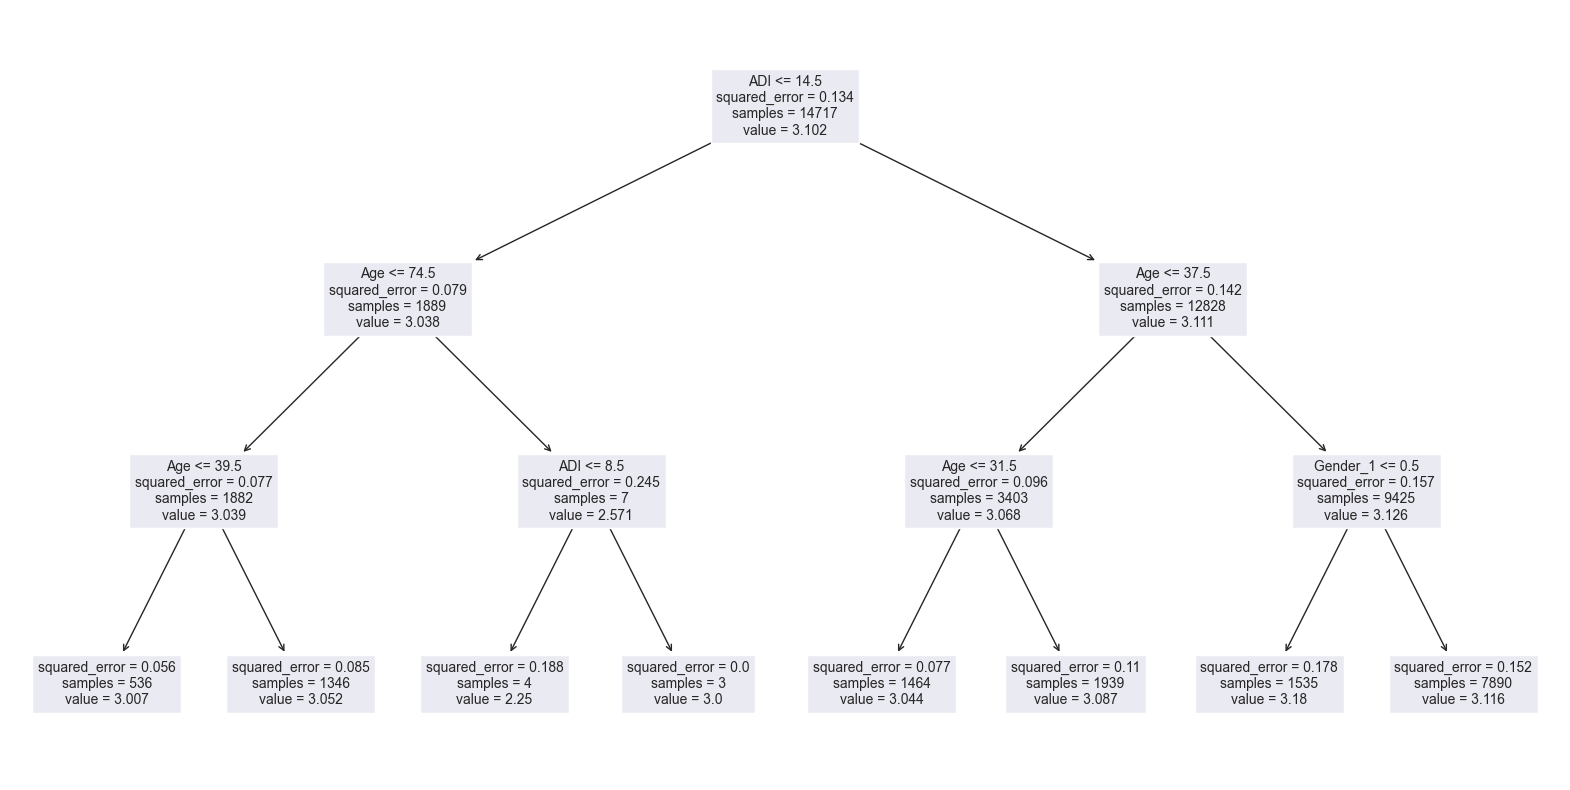

In [57]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(20, 10)) 
tree.plot_tree(decisiontreemodel, fontsize=10, feature_names=x_train.columns)

### Health factor to Heat factors

### Logistic Regression

#### 2018

In [78]:
dependent_variables = ['cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'lshrq_nutrition']
x = df_2018[['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']]
print('Multinomial Logistic Regression')
print('-----------------------------------------------------------------')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

for variable in dependent_variables:
    y = pd.DataFrame(df_2018[variable])
    y[variable] = y[variable].astype('category')

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    print(f'Dependent Variable: {variable}')
    print("Train Set :", y_train.shape, x_train.shape)
    print("Test Set  :", y_test.shape, x_test.shape)

    logmodel = LogisticRegression()

    logmodel.fit(x_train, y_train)

    print('Intercept of Regression \t: b = ', logmodel.intercept_)

    # coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
    # print(coef_value)
    # print()

    y_train_pred = logmodel.predict(x_train)
    y_test_pred = logmodel.predict(x_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", logmodel.score(x_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", logmodel.score(x_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

    x_with_constant = sm.add_constant(x_train)
    model = sm.Logit(y_train, x_with_constant)
    result = model.fit()

    print(result.summary())
    print('-----------------------------------------------------------------')

Multinomial Logistic Regression
-----------------------------------------------------------------
Dependent Variable: cc_RespiratorySinusAllergy_chronic
Train Set : (5436, 1) (5436, 6)
Test Set  : (1813, 1) (1813, 6)
Intercept of Regression 	: b =  [-3.7988821]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9328550404709345
Mean Squared Error (MSE) 	: 0.06714495952906549

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.924434638720353
Mean Squared Error (MSE) 	: 0.075565361279647
Optimization terminated successfully.
         Current function value: 0.245203
         Iterations 7
                                   Logit Regression Results                                   
Dep. Variable:     cc_RespiratorySinusAllergy_chronic   No. Observations:                 5436
Model:                                          Logit   Df Residuals:                     5429
Method:                                           MLE   Df Model:                   

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Whole dataset (Subgroup P)

In [59]:
dependent_variables = ['cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'lshrq_nutrition']
x = df_P[['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']]
print('Multinomial Logistic Regression')
print('-----------------------------------------------------------------')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

for variable in dependent_variables:
    y = pd.DataFrame(df_P[variable])
    y[variable] = y[variable].astype('category')

    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    print(f'Dependent Variable: {variable}')
    # print("Train Set :", y_train.shape, x_train.shape)
    # print("Test Set  :", y_test.shape, x_test.shape)

    logmodel = LogisticRegression()

    logmodel.fit(x, y)

    print('Intercept of Regression \t: b = ', logmodel.intercept_)

    # coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
    # print(coef_value)
    # print()

    y_pred = logmodel.predict(x)
    # y_test_pred = logmodel.predict(x_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", logmodel.score(x, y))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    # print("Goodness of Fit of Model \tTest Dataset")
    # print("Explained Variance (R^2) \t:", logmodel.score(x_test, y_test))
    # print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

    x_with_constant = sm.add_constant(x)
    model = sm.Logit(y, x_with_constant)
    result = model.fit()

    print(result.summary())
    print('-----------------------------------------------------------------')

Multinomial Logistic Regression
-----------------------------------------------------------------
Dependent Variable: cc_RespiratorySinusAllergy_chronic
Intercept of Regression 	: b =  [-3.33628177]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9284513071395811
Mean Squared Error (MSE) 	: 0.0715486928604189

Optimization terminated successfully.
         Current function value: 0.257354
         Iterations 7


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                                   Logit Regression Results                                   
Dep. Variable:     cc_RespiratorySinusAllergy_chronic   No. Observations:                19623
Model:                                          Logit   Df Residuals:                    19616
Method:                                           MLE   Df Model:                            6
Date:                                Thu, 07 Mar 2024   Pseudo R-squ.:                0.001060
Time:                                        11:49:32   Log-Likelihood:                -5050.1
converged:                                       True   LL-Null:                       -5055.4
Covariance Type:                            nonrobust   LLR p-value:                   0.09764
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.3393      0.394     

#### SVMs

In [60]:
dependent_variables = ['cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'lshrq_nutrition']
x = df_P[['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']]
print('SVM')
print('-----------------------------------------------------------------')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import svm
from sklearn import metrics

for variable in dependent_variables:
    y = pd.DataFrame(df_P[variable])
    y[variable] = y[variable].astype('category')

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    print(f'Dependent Variable: {variable}')
    print("Train Set :", y_train.shape, x_train.shape)
    print("Test Set  :", y_test.shape, x_test.shape)

    clf = svm.SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print('-----------------------------------------------------------------')

SVM
-----------------------------------------------------------------
Dependent Variable: cc_RespiratorySinusAllergy_chronic
Train Set : (14717, 1) (14717, 6)
Test Set  : (4906, 1) (4906, 6)


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9266204647370566
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------
Dependent Variable: cc_mskChronic
Train Set : (14717, 1) (14717, 6)
Test Set  : (4906, 1) (4906, 6)


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7350183448838158
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------
Dependent Variable: lshrq_nutrition
Train Set : (14717, 1) (14717, 6)
Test Set  : (4906, 1) (4906, 6)


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7647778230737872
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
dependent_variables = ['cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'lshrq_nutrition']
x = df_P[['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']]
print('SVM')
print('-----------------------------------------------------------------')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import svm
from sklearn import metrics

for variable in dependent_variables:
    y = pd.DataFrame(df_P[variable])
    y[variable] = y[variable].astype('category')

    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    print(f'Dependent Variable: {variable}')
    # print("Train Set :", y_train.shape, x_train.shape)
    # print("Test Set  :", y_test.shape, x_test.shape)

    clf = svm.SVC(kernel='linear')
    clf.fit(x, y)
    y_pred = clf.predict(x)

    print("Accuracy:",metrics.accuracy_score(y, y_pred))
    print("Precision:",metrics.precision_score(y, y_pred))
    print("Recall:",metrics.recall_score(y, y_pred))
    print('-----------------------------------------------------------------')

SVM
-----------------------------------------------------------------
Dependent Variable: cc_RespiratorySinusAllergy_chronic


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9284513071395811
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------
Dependent Variable: cc_mskChronic


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7322020078479335
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------
Dependent Variable: lshrq_nutrition


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7648677572236661
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Forecasting

#### cc_RespiratorySinusAllergy_chronic

#### Logistic Regression

In [79]:
y = pd.DataFrame(df_P['cc_RespiratorySinusAllergy_chronic'])
y['cc_RespiratorySinusAllergy_chronic'] = y['cc_RespiratorySinusAllergy_chronic'].astype('category')

dependent_variable = 'extreme_heat_2018'

x = df_P[[dependent_variable]]

logmodel = LogisticRegression()

logmodel.fit(x, y)

print('Intercept of Regression \t: b = ', logmodel.intercept_)

y_pred = logmodel.predict(x)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logmodel.score(x, y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_pred))
print()

x_with_constant = sm.add_constant(x)
model = sm.Logit(y, x_with_constant)
result = model.fit()

print(result.summary())

Intercept of Regression 	: b =  [-2.61912188]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9284513071395811
Mean Squared Error (MSE) 	: 0.0715486928604189

Optimization terminated successfully.
         Current function value: 0.257568
         Iterations 7
                                   Logit Regression Results                                   
Dep. Variable:     cc_RespiratorySinusAllergy_chronic   No. Observations:                19623
Model:                                          Logit   Df Residuals:                    19621
Method:                                           MLE   Df Model:                            1
Date:                                Thu, 07 Mar 2024   Pseudo R-squ.:               0.0002279
Time:                                        12:10:12   Log-Likelihood:                -5054.3
converged:                                       True   LL-Null:                       -5055.4
Covariance Type:                            nonrobus

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = logmodel.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Total counts: PredTotal
0    19623
Name: count, dtype: int64
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Total counts: PredTotal
0    19623
Name: count, dtype: int64


#### Random oversampling

In [81]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.metrics import classification_report

print(y.value_counts())

ros = RandomOverSampler(random_state=42)
x_ros, y_ros= ros.fit_resample(x, y)

print(y_ros.value_counts())

logmodel = LogisticRegression()
logmodel.fit(x_ros, y_ros)
y_ros_pred = logmodel.predict(x_ros)

print(classification_report(y_ros, y_ros_pred))

print("Accuracy:",metrics.accuracy_score(y_ros, y_ros_pred))
print("Precision:",metrics.precision_score(y_ros, y_ros_pred))
print("Recall:",metrics.recall_score(y_ros, y_ros_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     18219
           1       0.50      0.46      0.47     18219

    accuracy                           0.50     36438
   macro avg       0.50      0.50      0.49     36438
weighted avg       0.50      0.50      0.49     36438

Accuracy: 0.495718755145727
Precision: 0.49534717251252686
Recall: 0.45578791371644983


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = logmodel.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
1    19494
0      129
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
1    19590
0       33
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
1    19345
0      278
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
1    19539
0       84
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
1    19590
0       33
Name: count, dtype: int64


#### SVMs

In [64]:
variable = 'cc_RespiratorySinusAllergy_chronic'

y = pd.DataFrame(df_P['cc_RespiratorySinusAllergy_chronic'])
y['cc_RespiratorySinusAllergy_chronic'] = y['cc_RespiratorySinusAllergy_chronic'].astype('category')

dependent_variable = 'extreme_heat_2018'

x = df_P[[dependent_variable]]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print(f'Dependent Variable: {dependent_variable}')
# print("Train Set :", y_train.shape, x_train.shape)
# print("Test Set  :", y_test.shape, x_test.shape)

clf = svm.SVC(kernel='linear')
clf.fit(x, y)
y_pred = clf.predict(x)

print(classification_report(y, y_pred))

print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dependent Variable: extreme_heat_2018
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18219
           1       0.00      0.00      0.00      1404

    accuracy                           0.93     19623
   macro avg       0.46      0.50      0.48     19623
weighted avg       0.86      0.93      0.89     19623

Accuracy: 0.9284513071395811
Precision: 0.0
Recall: 0.0


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [65]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
0    19623
Name: count, dtype: int64


#### Random oversampling

In [67]:
# !pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ---------------------- ----------------- 143.4/257.7 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 257.7/257.7 kB 2.6 MB/s eta 0:00:00


In [68]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.metrics import classification_report

print(y.value_counts())

ros = RandomOverSampler(random_state=42)
x_ros, y_ros= ros.fit_resample(x, y)

print(y_ros.value_counts())

clf = svm.SVC(kernel='linear')
clf.fit(x_ros, y_ros)
y_ros_pred = clf.predict(x_ros)

print(classification_report(y_ros, y_ros_pred))

print("Accuracy:",metrics.accuracy_score(y_ros, y_ros_pred))
print("Precision:",metrics.precision_score(y_ros, y_ros_pred))
print("Recall:",metrics.recall_score(y_ros, y_ros_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.50      0.67      0.57     18219
           1       0.51      0.34      0.41     18219

    accuracy                           0.50     36438
   macro avg       0.50      0.50      0.49     36438
weighted avg       0.50      0.50      0.49     36438

Accuracy: 0.5034030407816016
Precision: 0.5050357374918778
Recall: 0.3412920577419178


In [69]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
1    19569
0       54
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
1    19267
0      356
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
1    19581
0       42
Name: count, dtype: int64


#### SMOTE sampling

In [70]:
print(y.value_counts())

smote = SMOTE(random_state=42)
x_smote, y_smote= smote.fit_resample(x, y)
print(y_smote.value_counts())

clf = svm.SVC(kernel='linear')
clf.fit(x_smote, y_smote)
y_smote_pred = clf.predict(x_smote)

print(classification_report(y_smote, y_smote_pred))

print("Accuracy:",metrics.accuracy_score(y_smote, y_smote_pred))
print("Precision:",metrics.precision_score(y_smote, y_smote_pred))
print("Recall:",metrics.recall_score(y_smote, y_smote_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.50      0.67      0.57     18219
           1       0.51      0.34      0.41     18219

    accuracy                           0.50     36438
   macro avg       0.50      0.50      0.49     36438
weighted avg       0.50      0.50      0.49     36438

Accuracy: 0.504308688731544
Precision: 0.5063588497367355
Recall: 0.3431033536418025


In [71]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
1    19569
0       54
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
1    19267
0      356
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
1    19581
0       42
Name: count, dtype: int64


#### Random undersampling

In [72]:
print(y.value_counts())

rus = RandomUnderSampler(random_state=42)
x_under, y_under= rus.fit_resample(x, y)

print(y_under.value_counts())

clf = svm.SVC(kernel='linear')
clf.fit(x_under, y_under)
y_under_pred = clf.predict(x_under)

print(classification_report(y_under, y_under_pred))

print("Accuracy:",metrics.accuracy_score(y_under, y_under_pred))
print("Precision:",metrics.precision_score(y_under, y_under_pred))
print("Recall:",metrics.recall_score(y_under, y_under_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     1404
1                                     1404
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      1404
           1       0.51      0.35      0.41      1404

    accuracy                           0.50      2808
   macro avg       0.50      0.50      0.49      2808
weighted avg       0.50      0.50      0.49      2808

Accuracy: 0.5042735042735043
Precision: 0.50625
Recall: 0.34615384615384615


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
1    19569
0       54
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
1    19267
0      356
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
1    19581
0       42
Name: count, dtype: int64


#### Undersampling using NearMiss

In [74]:
print(y.value_counts())

nearmiss = NearMiss(version=2)
x_nearmiss, y_nearmiss= nearmiss.fit_resample(x, y)

print(y_nearmiss.value_counts())

clf = svm.SVC(kernel='linear')
clf.fit(x_nearmiss, y_nearmiss)
y_nearmiss_pred = clf.predict(x_nearmiss)

print(classification_report(y_nearmiss, y_nearmiss_pred))

print("Accuracy:",metrics.accuracy_score(y_nearmiss, y_nearmiss_pred))
print("Precision:",metrics.precision_score(y_nearmiss, y_nearmiss_pred))
print("Recall:",metrics.recall_score(y_nearmiss, y_nearmiss_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     1404
1                                     1404
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1404
           1       1.00      0.65      0.79      1404

    accuracy                           0.83      2808
   macro avg       0.87      0.83      0.82      2808
weighted avg       0.87      0.83      0.82      2808

Accuracy: 0.8269230769230769
Precision: 1.0
Recall: 0.6538461538461539


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
0    19401
1      222
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
0    19581
1       42
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
0    19334
1      289
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
0    19494
1      129
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
0    19590
1       33
Name: count, dtype: int64


#### Random Forest

In [101]:
variable = 'cc_RespiratorySinusAllergy_chronic'

y = pd.DataFrame(df_P['cc_RespiratorySinusAllergy_chronic'])
y['cc_RespiratorySinusAllergy_chronic'] = y['cc_RespiratorySinusAllergy_chronic'].astype('category')

dependent_variable = ['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']

x = df_P[dependent_variable]

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print(f'Dependent Variable: {dependent_variable}')
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Dependent Variable: ['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']
Train Set : (14717, 1) (14717, 6)
Test Set  : (4906, 1) (4906, 6)


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9247859763554831
Precision: 0.3076923076923077
Recall: 0.01098901098901099


In [102]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_train, y_train)

best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataCon

Best hyperparameters: {'max_depth': 4, 'n_estimators': 252}


In [103]:
rf = RandomForestClassifier(n_estimators=252, max_depth=4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9258051365674684
Precision: 0.0
Recall: 0.0


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [104]:
feature_imp = pd.Series(rf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
feature_imp

wildfire_potential_2019.1    0.305096
wildfire_potential_2019      0.303421
wildfire_potential_2018      0.236129
extreme_heat_2018            0.068834
extreme_heat_2019            0.046023
extreme_heat_2020            0.040496
dtype: float64

#### Random Oversampling

In [106]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.metrics import classification_report

print(y.value_counts())

ros = RandomOverSampler(random_state=42)
x_ros, y_ros= ros.fit_resample(x, y)

print(y_ros.value_counts())

x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_ros_train, y_ros_train)
y_ros_pred = rf.predict(x_ros_test)

print(classification_report(y_ros_test, y_ros_pred))

print("Accuracy:",metrics.accuracy_score(y_ros_test, y_ros_pred))
print("Precision:",metrics.precision_score(y_ros_test, y_ros_pred))
print("Recall:",metrics.recall_score(y_ros_test, y_ros_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.67      0.56      0.61      4578
           1       0.62      0.72      0.67      4532

    accuracy                           0.64      9110
   macro avg       0.65      0.64      0.64      9110
weighted avg       0.65      0.64      0.64      9110

Accuracy: 0.6444566410537871
Precision: 0.6225127913587265
Recall: 0.7248455428067079


In [107]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_ros_train, y_ros_train)

best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataCon

Best hyperparameters: {'max_depth': 19, 'n_estimators': 477}


In [108]:
rf = RandomForestClassifier(n_estimators=477, max_depth=19)
rf.fit(x_ros_train, y_ros_train)
y_ros_pred = rf.predict(x_ros_test)

print("Accuracy:",accuracy_score(y_ros_test, y_ros_pred))
print("Precision:",precision_score(y_ros_test, y_ros_pred))
print("Recall:",recall_score(y_ros_test, y_ros_pred))

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6436882546652031
Precision: 0.62384437596302
Recall: 0.7146954986760812


In [109]:
feature_imp = pd.Series(rf.feature_importances_, index = x_ros_train.columns).sort_values(ascending = False)
feature_imp

wildfire_potential_2019      0.297198
wildfire_potential_2019.1    0.263365
wildfire_potential_2018      0.254525
extreme_heat_2018            0.070053
extreme_heat_2020            0.059323
extreme_heat_2019            0.055536
dtype: float64

#### SMOTE Oversampling

In [110]:
print(y.value_counts())

smote = SMOTE(random_state=42)
x_smote, y_smote= smote.fit_resample(x, y)
print(y_smote.value_counts())

x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_smote_train, y_smote_train)
y_smote_pred = rf.predict(x_smote_test)

print(classification_report(y_smote_test, y_smote_pred))

print("Accuracy:",metrics.accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",metrics.precision_score(y_smote_test, y_smote_pred))
print("Recall:",metrics.recall_score(y_smote_test, y_smote_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.74      0.60      0.67      4575
           1       0.66      0.79      0.72      4535

    accuracy                           0.69      9110
   macro avg       0.70      0.69      0.69      9110
weighted avg       0.70      0.69      0.69      9110

Accuracy: 0.6944017563117454
Precision: 0.6630050269968348
Recall: 0.785226019845645


In [111]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_smote_train, y_smote_train)

best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataCon

Best hyperparameters: {'max_depth': 17, 'n_estimators': 173}


In [112]:
rf = RandomForestClassifier(n_estimators=173, max_depth=17)
rf.fit(x_smote_train, y_smote_train)
y_smote_pred = rf.predict(x_smote_test)

print("Accuracy:",accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",precision_score(y_smote_test, y_smote_pred))
print("Recall:",recall_score(y_smote_test, y_smote_pred))

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6930845225027442
Precision: 0.6626145502150739
Recall: 0.7812568908489526


In [113]:
feature_imp = pd.Series(rf.feature_importances_, index = x_smote_train.columns).sort_values(ascending = False)
feature_imp

wildfire_potential_2019      0.289397
wildfire_potential_2019.1    0.283845
wildfire_potential_2018      0.267660
extreme_heat_2018            0.060524
extreme_heat_2020            0.051747
extreme_heat_2019            0.046827
dtype: float64

#### Random Undersampling

In [114]:
print(y.value_counts())

rus = RandomUnderSampler(random_state=42)
x_under, y_under= rus.fit_resample(x, y)

print(y_under.value_counts())

x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(x_under, y_under, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_under_train, y_under_train)
y_under_pred = rf.predict(x_under_test)

print(classification_report(y_under_test, y_under_pred))

print("Accuracy:",metrics.accuracy_score(y_under_test, y_under_pred))
print("Precision:",metrics.precision_score(y_under_test, y_under_pred))
print("Recall:",metrics.recall_score(y_under_test, y_under_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     1404
1                                     1404
Name: count, dtype: int64


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.54      0.50      0.52       357
           1       0.52      0.57      0.54       345

    accuracy                           0.53       702
   macro avg       0.53      0.53      0.53       702
weighted avg       0.53      0.53      0.53       702

Accuracy: 0.5313390313390314
Precision: 0.5213903743315508
Recall: 0.5652173913043478


In [115]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_under_train, y_under_train)

best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataCon

Best hyperparameters: {'max_depth': 13, 'n_estimators': 106}


In [116]:
rf = RandomForestClassifier(n_estimators=106, max_depth=13)
rf.fit(x_under_train, y_under_train)
y_under_pred = rf.predict(x_under_test)

print("Accuracy:",accuracy_score(y_under_test, y_under_pred))
print("Precision:",precision_score(y_under_test, y_under_pred))
print("Recall:",recall_score(y_under_test, y_under_pred))

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5270655270655271
Precision: 0.518005540166205
Recall: 0.5420289855072464


In [118]:
feature_imp = pd.Series(rf.feature_importances_, index = x_under_train.columns).sort_values(ascending = False)
feature_imp

wildfire_potential_2019      0.277452
wildfire_potential_2019.1    0.266702
wildfire_potential_2018      0.265636
extreme_heat_2018            0.080430
extreme_heat_2020            0.058726
extreme_heat_2019            0.051055
dtype: float64

#### Undersampling using NearMiss

In [119]:
print(y.value_counts())

nearmiss = NearMiss(version=2)
x_nearmiss, y_nearmiss= nearmiss.fit_resample(x, y)

print(y_nearmiss.value_counts())

x_nearmiss_train, x_nearmiss_test, y_nearmiss_train, y_nearmiss_test = train_test_split(x_nearmiss, y_nearmiss, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_nearmiss_train, y_nearmiss_train)
y_nearmiss_pred = rf.predict(x_nearmiss_test)

print(classification_report(y_nearmiss_test, y_nearmiss_pred))

print("Accuracy:",metrics.accuracy_score(y_nearmiss_test, y_nearmiss_pred))
print("Precision:",metrics.precision_score(y_nearmiss_test, y_nearmiss_pred))
print("Recall:",metrics.recall_score(y_nearmiss_test, y_nearmiss_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     1404
1                                     1404
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       367
           1       1.00      0.92      0.96       335

    accuracy                           0.96       702
   macro avg       0.97      0.96      0.96       702
weighted avg       0.96      0.96      0.96       702

Accuracy: 0.9615384615384616
Precision: 1.0
Recall: 0.9194029850746268


c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [120]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_nearmiss_train, y_nearmiss_train)

best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataCon

Best hyperparameters: {'max_depth': 18, 'n_estimators': 253}


In [121]:
rf = RandomForestClassifier(n_estimators=253, max_depth=18)
rf.fit(x_nearmiss_train, y_nearmiss_train)
y_nearmiss_pred = rf.predict(x_nearmiss_test)

print("Accuracy:",accuracy_score(y_nearmiss_test, y_nearmiss_pred))
print("Precision:",precision_score(y_nearmiss_test, y_nearmiss_pred))
print("Recall:",recall_score(y_nearmiss_test, y_nearmiss_pred))

c:\Users\Willis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9615384615384616
Precision: 1.0
Recall: 0.9194029850746268


In [123]:
feature_imp = pd.Series(rf.feature_importances_, index = x_nearmiss_train.columns).sort_values(ascending = False)
feature_imp

extreme_heat_2018            0.353451
extreme_heat_2019            0.177341
extreme_heat_2020            0.143918
wildfire_potential_2018      0.112852
wildfire_potential_2019      0.109243
wildfire_potential_2019.1    0.103194
dtype: float64

#### lshrq_nutrition